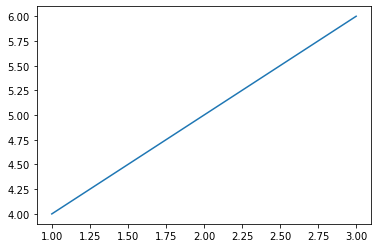

In [2]:
import matplotlib.pyplot as plt
plt.plot([1,2,3],[4,5,6])
plt.show()

In [3]:
import numpy as np
import torch
import torch.nn as nn
from PIL import Image, ImageDraw
import os
import random
np.random.seed(0)
random.seed(0)

In [4]:
class Classifier(nn.Module):
    def __init__(self,input_size,num_classes):
        super(Classifier,self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size,10)
        self.l2 = nn.Linear(10,num_classes)
        self.sigmoid = nn.Sigmoid()
    def forward(self,x):
        out = self.l1(x)
        out = self.sigmoid(out)
        out = self.l2(out)
        return out

In [5]:
model = Classifier(28*28,2)

In [6]:
path2data = "D:\FEL\Ya"
imageL = Image.open(os.path.join(path2data,"imL.png"))
imageN = Image.open(os.path.join(path2data,"imN.png"))

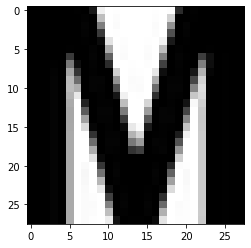

In [7]:
plt.imshow(imageL, cmap=plt.cm.gray)

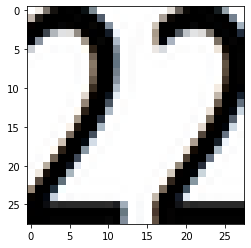

In [8]:
plt.imshow(imageN, cmap=plt.cm.gray)

In [9]:
imageL = np.array(imageL, dtype='f').flatten()
imageN = np.array(imageN, dtype='f').flatten()
for i in range(0,len(imageL)):
    if(imageL[i]<125):
        imageL[i] = -1
    else:
        imageL[i] = 1

for i in range(0,len(imageN)):
    if(imageN[i]<125):
        imageN[i] = -1
    else:
        imageN[i] = 1
        
print(imageL)
print(imageN)

[-1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.
  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1.
 -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.
 -1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1

In [10]:
import copy
num_noise_L = 250
data = []
for i in range(0,num_noise_L):
    noise_example_L = copy.deepcopy(imageL)
    num_pixels_to_change_L = np.uint8(np.random.rand(1)*np.ceil(len(imageL)/3))
    pixels_to_change_L = np.uint8(np.random.rand(num_pixels_to_change_L[0])*len(imageL))
    
    for j in pixels_to_change_L:
        noise_example_L[j] = -noise_example_L[j]
    noise_example_L = np.append(noise_example_L,0)
    data.append(noise_example_L)

In [11]:
num_noise_N = 250
for i in range(0,num_noise_N):
    noise_example_N = copy.deepcopy(imageN)
    num_pixels_to_change_N = np.uint8(np.random.rand(1)*np.ceil(len(imageN)/3))
    pixels_to_change_N = np.uint8(np.random.rand(num_pixels_to_change_N[0])*len(imageN))
    
    for j in pixels_to_change_N:
        noise_example_N[j] = -noise_example_N[j]
    noise_example_N = np.append(noise_example_N,1)
    data.append(noise_example_N)

In [12]:
random.shuffle(data)

In [13]:
print(len(imageL))

784


In [14]:
num_epochs = 500
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

n_total_steps = len(data)
for epoch in range(num_epochs):
    for i,image in enumerate(data):
         # Forward pass
        point_tensor = torch.from_numpy(np.array(image[:len(imageL)]).astype(np.float32))
        point_label = torch.tensor(np.array([image[len(imageL)]]),dtype=torch.long)
    
        outputs = model(point_tensor)
        loss = criterion(torch.reshape(outputs,(1,2)), point_label)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 10 == 0:
             print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/500], Step [10/500], Loss: 0.4040
Epoch [1/500], Step [20/500], Loss: 0.2534
Epoch [1/500], Step [30/500], Loss: 0.2048
Epoch [1/500], Step [40/500], Loss: 0.1826
Epoch [1/500], Step [50/500], Loss: 0.6657
Epoch [1/500], Step [60/500], Loss: 0.6511
Epoch [1/500], Step [70/500], Loss: 0.1434
Epoch [1/500], Step [80/500], Loss: 0.1356
Epoch [1/500], Step [90/500], Loss: 0.1273
Epoch [1/500], Step [100/500], Loss: 0.1227
Epoch [1/500], Step [110/500], Loss: 0.1146
Epoch [1/500], Step [120/500], Loss: 0.1058
Epoch [1/500], Step [130/500], Loss: 0.5350
Epoch [1/500], Step [140/500], Loss: 0.5226
Epoch [1/500], Step [150/500], Loss: 0.5125
Epoch [1/500], Step [160/500], Loss: 0.0785
Epoch [1/500], Step [170/500], Loss: 0.0740
Epoch [1/500], Step [180/500], Loss: 0.0695
Epoch [1/500], Step [190/500], Loss: 0.0648
Epoch [1/500], Step [200/500], Loss: 0.4660
Epoch [1/500], Step [210/500], Loss: 0.4530
Epoch [1/500], Step [220/500], Loss: 0.4365
Epoch [1/500], Step [230/500], Loss: 0.42

Epoch [4/500], Step [450/500], Loss: 0.0301
Epoch [4/500], Step [460/500], Loss: 0.0298
Epoch [4/500], Step [470/500], Loss: 0.0296
Epoch [4/500], Step [480/500], Loss: 0.0292
Epoch [4/500], Step [490/500], Loss: 0.0289
Epoch [4/500], Step [500/500], Loss: 0.0287
Epoch [5/500], Step [10/500], Loss: 0.0029
Epoch [5/500], Step [20/500], Loss: 0.0028
Epoch [5/500], Step [30/500], Loss: 0.0028
Epoch [5/500], Step [40/500], Loss: 0.0028
Epoch [5/500], Step [50/500], Loss: 0.0274
Epoch [5/500], Step [60/500], Loss: 0.0272
Epoch [5/500], Step [70/500], Loss: 0.0027
Epoch [5/500], Step [80/500], Loss: 0.0027
Epoch [5/500], Step [90/500], Loss: 0.0027
Epoch [5/500], Step [100/500], Loss: 0.0027
Epoch [5/500], Step [110/500], Loss: 0.0026
Epoch [5/500], Step [120/500], Loss: 0.0026
Epoch [5/500], Step [130/500], Loss: 0.0255
Epoch [5/500], Step [140/500], Loss: 0.0253
Epoch [5/500], Step [150/500], Loss: 0.0252
Epoch [5/500], Step [160/500], Loss: 0.0025
Epoch [5/500], Step [170/500], Loss: 0.00

Epoch [8/500], Step [370/500], Loss: 0.0007
Epoch [8/500], Step [380/500], Loss: 0.0007
Epoch [8/500], Step [390/500], Loss: 0.0073
Epoch [8/500], Step [400/500], Loss: 0.0007
Epoch [8/500], Step [410/500], Loss: 0.0007
Epoch [8/500], Step [420/500], Loss: 0.0007
Epoch [8/500], Step [430/500], Loss: 0.0071
Epoch [8/500], Step [440/500], Loss: 0.0070
Epoch [8/500], Step [450/500], Loss: 0.0070
Epoch [8/500], Step [460/500], Loss: 0.0069
Epoch [8/500], Step [470/500], Loss: 0.0069
Epoch [8/500], Step [480/500], Loss: 0.0068
Epoch [8/500], Step [490/500], Loss: 0.0068
Epoch [8/500], Step [500/500], Loss: 0.0068
Epoch [9/500], Step [10/500], Loss: 0.0007
Epoch [9/500], Step [20/500], Loss: 0.0007
Epoch [9/500], Step [30/500], Loss: 0.0007
Epoch [9/500], Step [40/500], Loss: 0.0007
Epoch [9/500], Step [50/500], Loss: 0.0066
Epoch [9/500], Step [60/500], Loss: 0.0065
Epoch [9/500], Step [70/500], Loss: 0.0006
Epoch [9/500], Step [80/500], Loss: 0.0006
Epoch [9/500], Step [90/500], Loss: 0.00

Epoch [12/500], Step [340/500], Loss: 0.0024
Epoch [12/500], Step [350/500], Loss: 0.0024
Epoch [12/500], Step [360/500], Loss: 0.0002
Epoch [12/500], Step [370/500], Loss: 0.0002
Epoch [12/500], Step [380/500], Loss: 0.0002
Epoch [12/500], Step [390/500], Loss: 0.0023
Epoch [12/500], Step [400/500], Loss: 0.0002
Epoch [12/500], Step [410/500], Loss: 0.0002
Epoch [12/500], Step [420/500], Loss: 0.0002
Epoch [12/500], Step [430/500], Loss: 0.0023
Epoch [12/500], Step [440/500], Loss: 0.0023
Epoch [12/500], Step [450/500], Loss: 0.0022
Epoch [12/500], Step [460/500], Loss: 0.0022
Epoch [12/500], Step [470/500], Loss: 0.0022
Epoch [12/500], Step [480/500], Loss: 0.0022
Epoch [12/500], Step [490/500], Loss: 0.0022
Epoch [12/500], Step [500/500], Loss: 0.0022
Epoch [13/500], Step [10/500], Loss: 0.0002
Epoch [13/500], Step [20/500], Loss: 0.0002
Epoch [13/500], Step [30/500], Loss: 0.0002
Epoch [13/500], Step [40/500], Loss: 0.0002
Epoch [13/500], Step [50/500], Loss: 0.0021
Epoch [13/500],

Epoch [16/500], Step [240/500], Loss: 0.0009
Epoch [16/500], Step [250/500], Loss: 0.0001
Epoch [16/500], Step [260/500], Loss: 0.0001
Epoch [16/500], Step [270/500], Loss: 0.0001
Epoch [16/500], Step [280/500], Loss: 0.0009
Epoch [16/500], Step [290/500], Loss: 0.0009
Epoch [16/500], Step [300/500], Loss: 0.0009
Epoch [16/500], Step [310/500], Loss: 0.0001
Epoch [16/500], Step [320/500], Loss: 0.0009
Epoch [16/500], Step [330/500], Loss: 0.0009
Epoch [16/500], Step [340/500], Loss: 0.0008
Epoch [16/500], Step [350/500], Loss: 0.0008
Epoch [16/500], Step [360/500], Loss: 0.0001
Epoch [16/500], Step [370/500], Loss: 0.0001
Epoch [16/500], Step [380/500], Loss: 0.0001
Epoch [16/500], Step [390/500], Loss: 0.0008
Epoch [16/500], Step [400/500], Loss: 0.0001
Epoch [16/500], Step [410/500], Loss: 0.0001
Epoch [16/500], Step [420/500], Loss: 0.0001
Epoch [16/500], Step [430/500], Loss: 0.0008
Epoch [16/500], Step [440/500], Loss: 0.0008
Epoch [16/500], Step [450/500], Loss: 0.0008
Epoch [16/

Epoch [20/500], Step [120/500], Loss: 0.0000
Epoch [20/500], Step [130/500], Loss: 0.0003
Epoch [20/500], Step [140/500], Loss: 0.0003
Epoch [20/500], Step [150/500], Loss: 0.0003
Epoch [20/500], Step [160/500], Loss: 0.0000
Epoch [20/500], Step [170/500], Loss: 0.0000
Epoch [20/500], Step [180/500], Loss: 0.0000
Epoch [20/500], Step [190/500], Loss: 0.0000
Epoch [20/500], Step [200/500], Loss: 0.0003
Epoch [20/500], Step [210/500], Loss: 0.0003
Epoch [20/500], Step [220/500], Loss: 0.0003
Epoch [20/500], Step [230/500], Loss: 0.0003
Epoch [20/500], Step [240/500], Loss: 0.0003
Epoch [20/500], Step [250/500], Loss: 0.0000
Epoch [20/500], Step [260/500], Loss: 0.0000
Epoch [20/500], Step [270/500], Loss: 0.0000
Epoch [20/500], Step [280/500], Loss: 0.0003
Epoch [20/500], Step [290/500], Loss: 0.0003
Epoch [20/500], Step [300/500], Loss: 0.0003
Epoch [20/500], Step [310/500], Loss: 0.0000
Epoch [20/500], Step [320/500], Loss: 0.0003
Epoch [20/500], Step [330/500], Loss: 0.0003
Epoch [20/

Epoch [23/500], Step [500/500], Loss: 0.0001
Epoch [24/500], Step [10/500], Loss: 0.0000
Epoch [24/500], Step [20/500], Loss: 0.0000
Epoch [24/500], Step [30/500], Loss: 0.0000
Epoch [24/500], Step [40/500], Loss: 0.0000
Epoch [24/500], Step [50/500], Loss: 0.0001
Epoch [24/500], Step [60/500], Loss: 0.0001
Epoch [24/500], Step [70/500], Loss: 0.0000
Epoch [24/500], Step [80/500], Loss: 0.0000
Epoch [24/500], Step [90/500], Loss: 0.0000
Epoch [24/500], Step [100/500], Loss: 0.0000
Epoch [24/500], Step [110/500], Loss: 0.0000
Epoch [24/500], Step [120/500], Loss: 0.0000
Epoch [24/500], Step [130/500], Loss: 0.0001
Epoch [24/500], Step [140/500], Loss: 0.0001
Epoch [24/500], Step [150/500], Loss: 0.0001
Epoch [24/500], Step [160/500], Loss: 0.0000
Epoch [24/500], Step [170/500], Loss: 0.0000
Epoch [24/500], Step [180/500], Loss: 0.0000
Epoch [24/500], Step [190/500], Loss: 0.0000
Epoch [24/500], Step [200/500], Loss: 0.0001
Epoch [24/500], Step [210/500], Loss: 0.0001
Epoch [24/500], Ste

Epoch [27/500], Step [390/500], Loss: 0.0001
Epoch [27/500], Step [400/500], Loss: 0.0000
Epoch [27/500], Step [410/500], Loss: 0.0000
Epoch [27/500], Step [420/500], Loss: 0.0000
Epoch [27/500], Step [430/500], Loss: 0.0001
Epoch [27/500], Step [440/500], Loss: 0.0001
Epoch [27/500], Step [450/500], Loss: 0.0001
Epoch [27/500], Step [460/500], Loss: 0.0001
Epoch [27/500], Step [470/500], Loss: 0.0001
Epoch [27/500], Step [480/500], Loss: 0.0001
Epoch [27/500], Step [490/500], Loss: 0.0001
Epoch [27/500], Step [500/500], Loss: 0.0001
Epoch [28/500], Step [10/500], Loss: 0.0000
Epoch [28/500], Step [20/500], Loss: 0.0000
Epoch [28/500], Step [30/500], Loss: 0.0000
Epoch [28/500], Step [40/500], Loss: 0.0000
Epoch [28/500], Step [50/500], Loss: 0.0000
Epoch [28/500], Step [60/500], Loss: 0.0000
Epoch [28/500], Step [70/500], Loss: 0.0000
Epoch [28/500], Step [80/500], Loss: 0.0000
Epoch [28/500], Step [90/500], Loss: 0.0000
Epoch [28/500], Step [100/500], Loss: 0.0000
Epoch [28/500], Ste

Epoch [31/500], Step [360/500], Loss: 0.0000
Epoch [31/500], Step [370/500], Loss: 0.0000
Epoch [31/500], Step [380/500], Loss: 0.0000
Epoch [31/500], Step [390/500], Loss: 0.0000
Epoch [31/500], Step [400/500], Loss: 0.0000
Epoch [31/500], Step [410/500], Loss: 0.0000
Epoch [31/500], Step [420/500], Loss: 0.0000
Epoch [31/500], Step [430/500], Loss: 0.0000
Epoch [31/500], Step [440/500], Loss: 0.0000
Epoch [31/500], Step [450/500], Loss: 0.0000
Epoch [31/500], Step [460/500], Loss: 0.0000
Epoch [31/500], Step [470/500], Loss: 0.0000
Epoch [31/500], Step [480/500], Loss: 0.0000
Epoch [31/500], Step [490/500], Loss: 0.0000
Epoch [31/500], Step [500/500], Loss: 0.0000
Epoch [32/500], Step [10/500], Loss: 0.0000
Epoch [32/500], Step [20/500], Loss: 0.0000
Epoch [32/500], Step [30/500], Loss: 0.0000
Epoch [32/500], Step [40/500], Loss: 0.0000
Epoch [32/500], Step [50/500], Loss: 0.0000
Epoch [32/500], Step [60/500], Loss: 0.0000
Epoch [32/500], Step [70/500], Loss: 0.0000
Epoch [32/500], S

Epoch [35/500], Step [230/500], Loss: 0.0000
Epoch [35/500], Step [240/500], Loss: 0.0000
Epoch [35/500], Step [250/500], Loss: 0.0000
Epoch [35/500], Step [260/500], Loss: 0.0000
Epoch [35/500], Step [270/500], Loss: 0.0000
Epoch [35/500], Step [280/500], Loss: 0.0000
Epoch [35/500], Step [290/500], Loss: 0.0000
Epoch [35/500], Step [300/500], Loss: 0.0000
Epoch [35/500], Step [310/500], Loss: 0.0000
Epoch [35/500], Step [320/500], Loss: 0.0000
Epoch [35/500], Step [330/500], Loss: 0.0000
Epoch [35/500], Step [340/500], Loss: 0.0000
Epoch [35/500], Step [350/500], Loss: 0.0000
Epoch [35/500], Step [360/500], Loss: 0.0000
Epoch [35/500], Step [370/500], Loss: 0.0000
Epoch [35/500], Step [380/500], Loss: 0.0000
Epoch [35/500], Step [390/500], Loss: 0.0000
Epoch [35/500], Step [400/500], Loss: 0.0000
Epoch [35/500], Step [410/500], Loss: 0.0000
Epoch [35/500], Step [420/500], Loss: 0.0000
Epoch [35/500], Step [430/500], Loss: 0.0000
Epoch [35/500], Step [440/500], Loss: 0.0000
Epoch [35/

Epoch [39/500], Step [120/500], Loss: 0.0000
Epoch [39/500], Step [130/500], Loss: 0.0000
Epoch [39/500], Step [140/500], Loss: 0.0000
Epoch [39/500], Step [150/500], Loss: 0.0000
Epoch [39/500], Step [160/500], Loss: 0.0000
Epoch [39/500], Step [170/500], Loss: 0.0000
Epoch [39/500], Step [180/500], Loss: 0.0000
Epoch [39/500], Step [190/500], Loss: 0.0000
Epoch [39/500], Step [200/500], Loss: 0.0000
Epoch [39/500], Step [210/500], Loss: 0.0000
Epoch [39/500], Step [220/500], Loss: 0.0000
Epoch [39/500], Step [230/500], Loss: 0.0000
Epoch [39/500], Step [240/500], Loss: 0.0000
Epoch [39/500], Step [250/500], Loss: 0.0000
Epoch [39/500], Step [260/500], Loss: 0.0000
Epoch [39/500], Step [270/500], Loss: 0.0000
Epoch [39/500], Step [280/500], Loss: 0.0000
Epoch [39/500], Step [290/500], Loss: 0.0000
Epoch [39/500], Step [300/500], Loss: 0.0000
Epoch [39/500], Step [310/500], Loss: 0.0000
Epoch [39/500], Step [320/500], Loss: 0.0000
Epoch [39/500], Step [330/500], Loss: 0.0000
Epoch [39/

Epoch [43/500], Step [50/500], Loss: 0.0000
Epoch [43/500], Step [60/500], Loss: 0.0000
Epoch [43/500], Step [70/500], Loss: 0.0000
Epoch [43/500], Step [80/500], Loss: 0.0000
Epoch [43/500], Step [90/500], Loss: 0.0000
Epoch [43/500], Step [100/500], Loss: 0.0000
Epoch [43/500], Step [110/500], Loss: 0.0000
Epoch [43/500], Step [120/500], Loss: 0.0000
Epoch [43/500], Step [130/500], Loss: 0.0000
Epoch [43/500], Step [140/500], Loss: 0.0000
Epoch [43/500], Step [150/500], Loss: 0.0000
Epoch [43/500], Step [160/500], Loss: 0.0000
Epoch [43/500], Step [170/500], Loss: 0.0000
Epoch [43/500], Step [180/500], Loss: 0.0000
Epoch [43/500], Step [190/500], Loss: 0.0000
Epoch [43/500], Step [200/500], Loss: 0.0000
Epoch [43/500], Step [210/500], Loss: 0.0000
Epoch [43/500], Step [220/500], Loss: 0.0000
Epoch [43/500], Step [230/500], Loss: 0.0000
Epoch [43/500], Step [240/500], Loss: 0.0000
Epoch [43/500], Step [250/500], Loss: 0.0000
Epoch [43/500], Step [260/500], Loss: 0.0000
Epoch [43/500],

Epoch [46/500], Step [460/500], Loss: 0.0000
Epoch [46/500], Step [470/500], Loss: 0.0000
Epoch [46/500], Step [480/500], Loss: 0.0000
Epoch [46/500], Step [490/500], Loss: 0.0000
Epoch [46/500], Step [500/500], Loss: 0.0000
Epoch [47/500], Step [10/500], Loss: 0.0000
Epoch [47/500], Step [20/500], Loss: 0.0000
Epoch [47/500], Step [30/500], Loss: 0.0000
Epoch [47/500], Step [40/500], Loss: 0.0000
Epoch [47/500], Step [50/500], Loss: 0.0000
Epoch [47/500], Step [60/500], Loss: 0.0000
Epoch [47/500], Step [70/500], Loss: 0.0000
Epoch [47/500], Step [80/500], Loss: 0.0000
Epoch [47/500], Step [90/500], Loss: 0.0000
Epoch [47/500], Step [100/500], Loss: 0.0000
Epoch [47/500], Step [110/500], Loss: 0.0000
Epoch [47/500], Step [120/500], Loss: 0.0000
Epoch [47/500], Step [130/500], Loss: 0.0000
Epoch [47/500], Step [140/500], Loss: 0.0000
Epoch [47/500], Step [150/500], Loss: 0.0000
Epoch [47/500], Step [160/500], Loss: 0.0000
Epoch [47/500], Step [170/500], Loss: 0.0000
Epoch [47/500], Ste

Epoch [50/500], Step [440/500], Loss: 0.0000
Epoch [50/500], Step [450/500], Loss: 0.0000
Epoch [50/500], Step [460/500], Loss: 0.0000
Epoch [50/500], Step [470/500], Loss: 0.0000
Epoch [50/500], Step [480/500], Loss: 0.0000
Epoch [50/500], Step [490/500], Loss: 0.0000
Epoch [50/500], Step [500/500], Loss: 0.0000
Epoch [51/500], Step [10/500], Loss: 0.0000
Epoch [51/500], Step [20/500], Loss: 0.0000
Epoch [51/500], Step [30/500], Loss: 0.0000
Epoch [51/500], Step [40/500], Loss: 0.0000
Epoch [51/500], Step [50/500], Loss: 0.0000
Epoch [51/500], Step [60/500], Loss: 0.0000
Epoch [51/500], Step [70/500], Loss: 0.0000
Epoch [51/500], Step [80/500], Loss: 0.0000
Epoch [51/500], Step [90/500], Loss: 0.0000
Epoch [51/500], Step [100/500], Loss: 0.0000
Epoch [51/500], Step [110/500], Loss: 0.0000
Epoch [51/500], Step [120/500], Loss: 0.0000
Epoch [51/500], Step [130/500], Loss: 0.0000
Epoch [51/500], Step [140/500], Loss: 0.0000
Epoch [51/500], Step [150/500], Loss: 0.0000
Epoch [51/500], Ste

Epoch [54/500], Step [270/500], Loss: 0.0000
Epoch [54/500], Step [280/500], Loss: 0.0000
Epoch [54/500], Step [290/500], Loss: 0.0000
Epoch [54/500], Step [300/500], Loss: 0.0000
Epoch [54/500], Step [310/500], Loss: 0.0000
Epoch [54/500], Step [320/500], Loss: 0.0000
Epoch [54/500], Step [330/500], Loss: 0.0000
Epoch [54/500], Step [340/500], Loss: 0.0000
Epoch [54/500], Step [350/500], Loss: 0.0000
Epoch [54/500], Step [360/500], Loss: 0.0000
Epoch [54/500], Step [370/500], Loss: 0.0000
Epoch [54/500], Step [380/500], Loss: 0.0000
Epoch [54/500], Step [390/500], Loss: 0.0000
Epoch [54/500], Step [400/500], Loss: 0.0000
Epoch [54/500], Step [410/500], Loss: 0.0000
Epoch [54/500], Step [420/500], Loss: 0.0000
Epoch [54/500], Step [430/500], Loss: 0.0000
Epoch [54/500], Step [440/500], Loss: 0.0000
Epoch [54/500], Step [450/500], Loss: 0.0000
Epoch [54/500], Step [460/500], Loss: 0.0000
Epoch [54/500], Step [470/500], Loss: 0.0000
Epoch [54/500], Step [480/500], Loss: 0.0000
Epoch [54/

Epoch [58/500], Step [250/500], Loss: 0.0000
Epoch [58/500], Step [260/500], Loss: 0.0000
Epoch [58/500], Step [270/500], Loss: 0.0000
Epoch [58/500], Step [280/500], Loss: 0.0000
Epoch [58/500], Step [290/500], Loss: 0.0000
Epoch [58/500], Step [300/500], Loss: 0.0000
Epoch [58/500], Step [310/500], Loss: 0.0000
Epoch [58/500], Step [320/500], Loss: 0.0000
Epoch [58/500], Step [330/500], Loss: 0.0000
Epoch [58/500], Step [340/500], Loss: 0.0000
Epoch [58/500], Step [350/500], Loss: 0.0000
Epoch [58/500], Step [360/500], Loss: 0.0000
Epoch [58/500], Step [370/500], Loss: 0.0000
Epoch [58/500], Step [380/500], Loss: 0.0000
Epoch [58/500], Step [390/500], Loss: 0.0000
Epoch [58/500], Step [400/500], Loss: 0.0000
Epoch [58/500], Step [410/500], Loss: 0.0000
Epoch [58/500], Step [420/500], Loss: 0.0000
Epoch [58/500], Step [430/500], Loss: 0.0000
Epoch [58/500], Step [440/500], Loss: 0.0000
Epoch [58/500], Step [450/500], Loss: 0.0000
Epoch [58/500], Step [460/500], Loss: 0.0000
Epoch [58/

Epoch [62/500], Step [180/500], Loss: 0.0000
Epoch [62/500], Step [190/500], Loss: 0.0000
Epoch [62/500], Step [200/500], Loss: 0.0000
Epoch [62/500], Step [210/500], Loss: 0.0000
Epoch [62/500], Step [220/500], Loss: 0.0000
Epoch [62/500], Step [230/500], Loss: 0.0000
Epoch [62/500], Step [240/500], Loss: 0.0000
Epoch [62/500], Step [250/500], Loss: 0.0000
Epoch [62/500], Step [260/500], Loss: 0.0000
Epoch [62/500], Step [270/500], Loss: 0.0000
Epoch [62/500], Step [280/500], Loss: 0.0000
Epoch [62/500], Step [290/500], Loss: 0.0000
Epoch [62/500], Step [300/500], Loss: 0.0000
Epoch [62/500], Step [310/500], Loss: 0.0000
Epoch [62/500], Step [320/500], Loss: 0.0000
Epoch [62/500], Step [330/500], Loss: 0.0000
Epoch [62/500], Step [340/500], Loss: 0.0000
Epoch [62/500], Step [350/500], Loss: 0.0000
Epoch [62/500], Step [360/500], Loss: 0.0000
Epoch [62/500], Step [370/500], Loss: 0.0000
Epoch [62/500], Step [380/500], Loss: 0.0000
Epoch [62/500], Step [390/500], Loss: 0.0000
Epoch [62/

Epoch [66/500], Step [40/500], Loss: 0.0000
Epoch [66/500], Step [50/500], Loss: 0.0000
Epoch [66/500], Step [60/500], Loss: 0.0000
Epoch [66/500], Step [70/500], Loss: 0.0000
Epoch [66/500], Step [80/500], Loss: 0.0000
Epoch [66/500], Step [90/500], Loss: 0.0000
Epoch [66/500], Step [100/500], Loss: 0.0000
Epoch [66/500], Step [110/500], Loss: 0.0000
Epoch [66/500], Step [120/500], Loss: 0.0000
Epoch [66/500], Step [130/500], Loss: 0.0000
Epoch [66/500], Step [140/500], Loss: 0.0000
Epoch [66/500], Step [150/500], Loss: 0.0000
Epoch [66/500], Step [160/500], Loss: 0.0000
Epoch [66/500], Step [170/500], Loss: 0.0000
Epoch [66/500], Step [180/500], Loss: 0.0000
Epoch [66/500], Step [190/500], Loss: 0.0000
Epoch [66/500], Step [200/500], Loss: 0.0000
Epoch [66/500], Step [210/500], Loss: 0.0000
Epoch [66/500], Step [220/500], Loss: 0.0000
Epoch [66/500], Step [230/500], Loss: 0.0000
Epoch [66/500], Step [240/500], Loss: 0.0000
Epoch [66/500], Step [250/500], Loss: 0.0000
Epoch [66/500], 

Epoch [69/500], Step [480/500], Loss: 0.0000
Epoch [69/500], Step [490/500], Loss: 0.0000
Epoch [69/500], Step [500/500], Loss: 0.0000
Epoch [70/500], Step [10/500], Loss: 0.0000
Epoch [70/500], Step [20/500], Loss: 0.0000
Epoch [70/500], Step [30/500], Loss: 0.0000
Epoch [70/500], Step [40/500], Loss: 0.0000
Epoch [70/500], Step [50/500], Loss: 0.0000
Epoch [70/500], Step [60/500], Loss: 0.0000
Epoch [70/500], Step [70/500], Loss: 0.0000
Epoch [70/500], Step [80/500], Loss: 0.0000
Epoch [70/500], Step [90/500], Loss: 0.0000
Epoch [70/500], Step [100/500], Loss: 0.0000
Epoch [70/500], Step [110/500], Loss: 0.0000
Epoch [70/500], Step [120/500], Loss: 0.0000
Epoch [70/500], Step [130/500], Loss: 0.0000
Epoch [70/500], Step [140/500], Loss: 0.0000
Epoch [70/500], Step [150/500], Loss: 0.0000
Epoch [70/500], Step [160/500], Loss: 0.0000
Epoch [70/500], Step [170/500], Loss: 0.0000
Epoch [70/500], Step [180/500], Loss: 0.0000
Epoch [70/500], Step [190/500], Loss: 0.0000
Epoch [70/500], Ste

Epoch [73/500], Step [430/500], Loss: 0.0000
Epoch [73/500], Step [440/500], Loss: 0.0000
Epoch [73/500], Step [450/500], Loss: 0.0000
Epoch [73/500], Step [460/500], Loss: 0.0000
Epoch [73/500], Step [470/500], Loss: 0.0000
Epoch [73/500], Step [480/500], Loss: 0.0000
Epoch [73/500], Step [490/500], Loss: 0.0000
Epoch [73/500], Step [500/500], Loss: 0.0000
Epoch [74/500], Step [10/500], Loss: 0.0000
Epoch [74/500], Step [20/500], Loss: 0.0000
Epoch [74/500], Step [30/500], Loss: 0.0000
Epoch [74/500], Step [40/500], Loss: 0.0000
Epoch [74/500], Step [50/500], Loss: 0.0000
Epoch [74/500], Step [60/500], Loss: 0.0000
Epoch [74/500], Step [70/500], Loss: 0.0000
Epoch [74/500], Step [80/500], Loss: 0.0000
Epoch [74/500], Step [90/500], Loss: 0.0000
Epoch [74/500], Step [100/500], Loss: 0.0000
Epoch [74/500], Step [110/500], Loss: 0.0000
Epoch [74/500], Step [120/500], Loss: 0.0000
Epoch [74/500], Step [130/500], Loss: 0.0000
Epoch [74/500], Step [140/500], Loss: 0.0000
Epoch [74/500], Ste

Epoch [77/500], Step [340/500], Loss: 0.0000
Epoch [77/500], Step [350/500], Loss: 0.0000
Epoch [77/500], Step [360/500], Loss: 0.0000
Epoch [77/500], Step [370/500], Loss: 0.0000
Epoch [77/500], Step [380/500], Loss: 0.0000
Epoch [77/500], Step [390/500], Loss: 0.0000
Epoch [77/500], Step [400/500], Loss: 0.0000
Epoch [77/500], Step [410/500], Loss: 0.0000
Epoch [77/500], Step [420/500], Loss: 0.0000
Epoch [77/500], Step [430/500], Loss: 0.0000
Epoch [77/500], Step [440/500], Loss: 0.0000
Epoch [77/500], Step [450/500], Loss: 0.0000
Epoch [77/500], Step [460/500], Loss: 0.0000
Epoch [77/500], Step [470/500], Loss: 0.0000
Epoch [77/500], Step [480/500], Loss: 0.0000
Epoch [77/500], Step [490/500], Loss: 0.0000
Epoch [77/500], Step [500/500], Loss: 0.0000
Epoch [78/500], Step [10/500], Loss: 0.0000
Epoch [78/500], Step [20/500], Loss: 0.0000
Epoch [78/500], Step [30/500], Loss: 0.0000
Epoch [78/500], Step [40/500], Loss: 0.0000
Epoch [78/500], Step [50/500], Loss: 0.0000
Epoch [78/500],

Epoch [81/500], Step [280/500], Loss: 0.0000
Epoch [81/500], Step [290/500], Loss: 0.0000
Epoch [81/500], Step [300/500], Loss: 0.0000
Epoch [81/500], Step [310/500], Loss: 0.0000
Epoch [81/500], Step [320/500], Loss: 0.0000
Epoch [81/500], Step [330/500], Loss: 0.0000
Epoch [81/500], Step [340/500], Loss: 0.0000
Epoch [81/500], Step [350/500], Loss: 0.0000
Epoch [81/500], Step [360/500], Loss: 0.0000
Epoch [81/500], Step [370/500], Loss: 0.0000
Epoch [81/500], Step [380/500], Loss: 0.0000
Epoch [81/500], Step [390/500], Loss: 0.0000
Epoch [81/500], Step [400/500], Loss: 0.0000
Epoch [81/500], Step [410/500], Loss: 0.0000
Epoch [81/500], Step [420/500], Loss: 0.0000
Epoch [81/500], Step [430/500], Loss: 0.0000
Epoch [81/500], Step [440/500], Loss: 0.0000
Epoch [81/500], Step [450/500], Loss: 0.0000
Epoch [81/500], Step [460/500], Loss: 0.0000
Epoch [81/500], Step [470/500], Loss: 0.0000
Epoch [81/500], Step [480/500], Loss: 0.0000
Epoch [81/500], Step [490/500], Loss: 0.0000
Epoch [81/

Epoch [85/500], Step [160/500], Loss: 0.0000
Epoch [85/500], Step [170/500], Loss: 0.0000
Epoch [85/500], Step [180/500], Loss: 0.0000
Epoch [85/500], Step [190/500], Loss: 0.0000
Epoch [85/500], Step [200/500], Loss: 0.0000
Epoch [85/500], Step [210/500], Loss: 0.0000
Epoch [85/500], Step [220/500], Loss: 0.0000
Epoch [85/500], Step [230/500], Loss: 0.0000
Epoch [85/500], Step [240/500], Loss: 0.0000
Epoch [85/500], Step [250/500], Loss: 0.0000
Epoch [85/500], Step [260/500], Loss: 0.0000
Epoch [85/500], Step [270/500], Loss: 0.0000
Epoch [85/500], Step [280/500], Loss: 0.0000
Epoch [85/500], Step [290/500], Loss: 0.0000
Epoch [85/500], Step [300/500], Loss: 0.0000
Epoch [85/500], Step [310/500], Loss: 0.0000
Epoch [85/500], Step [320/500], Loss: 0.0000
Epoch [85/500], Step [330/500], Loss: 0.0000
Epoch [85/500], Step [340/500], Loss: 0.0000
Epoch [85/500], Step [350/500], Loss: 0.0000
Epoch [85/500], Step [360/500], Loss: 0.0000
Epoch [85/500], Step [370/500], Loss: 0.0000
Epoch [85/

Epoch [88/500], Step [490/500], Loss: 0.0000
Epoch [88/500], Step [500/500], Loss: 0.0000
Epoch [89/500], Step [10/500], Loss: 0.0000
Epoch [89/500], Step [20/500], Loss: 0.0000
Epoch [89/500], Step [30/500], Loss: 0.0000
Epoch [89/500], Step [40/500], Loss: 0.0000
Epoch [89/500], Step [50/500], Loss: 0.0000
Epoch [89/500], Step [60/500], Loss: 0.0000
Epoch [89/500], Step [70/500], Loss: 0.0000
Epoch [89/500], Step [80/500], Loss: 0.0000
Epoch [89/500], Step [90/500], Loss: 0.0000
Epoch [89/500], Step [100/500], Loss: 0.0000
Epoch [89/500], Step [110/500], Loss: 0.0000
Epoch [89/500], Step [120/500], Loss: 0.0000
Epoch [89/500], Step [130/500], Loss: 0.0000
Epoch [89/500], Step [140/500], Loss: 0.0000
Epoch [89/500], Step [150/500], Loss: 0.0000
Epoch [89/500], Step [160/500], Loss: 0.0000
Epoch [89/500], Step [170/500], Loss: 0.0000
Epoch [89/500], Step [180/500], Loss: 0.0000
Epoch [89/500], Step [190/500], Loss: 0.0000
Epoch [89/500], Step [200/500], Loss: 0.0000
Epoch [89/500], Ste

Epoch [92/500], Step [450/500], Loss: 0.0000
Epoch [92/500], Step [460/500], Loss: 0.0000
Epoch [92/500], Step [470/500], Loss: 0.0000
Epoch [92/500], Step [480/500], Loss: 0.0000
Epoch [92/500], Step [490/500], Loss: 0.0000
Epoch [92/500], Step [500/500], Loss: 0.0000
Epoch [93/500], Step [10/500], Loss: 0.0000
Epoch [93/500], Step [20/500], Loss: 0.0000
Epoch [93/500], Step [30/500], Loss: 0.0000
Epoch [93/500], Step [40/500], Loss: 0.0000
Epoch [93/500], Step [50/500], Loss: 0.0000
Epoch [93/500], Step [60/500], Loss: 0.0000
Epoch [93/500], Step [70/500], Loss: 0.0000
Epoch [93/500], Step [80/500], Loss: 0.0000
Epoch [93/500], Step [90/500], Loss: 0.0000
Epoch [93/500], Step [100/500], Loss: 0.0000
Epoch [93/500], Step [110/500], Loss: 0.0000
Epoch [93/500], Step [120/500], Loss: 0.0000
Epoch [93/500], Step [130/500], Loss: 0.0000
Epoch [93/500], Step [140/500], Loss: 0.0000
Epoch [93/500], Step [150/500], Loss: 0.0000
Epoch [93/500], Step [160/500], Loss: 0.0000
Epoch [93/500], Ste

Epoch [96/500], Step [330/500], Loss: 0.0000
Epoch [96/500], Step [340/500], Loss: 0.0000
Epoch [96/500], Step [350/500], Loss: 0.0000
Epoch [96/500], Step [360/500], Loss: 0.0000
Epoch [96/500], Step [370/500], Loss: 0.0000
Epoch [96/500], Step [380/500], Loss: 0.0000
Epoch [96/500], Step [390/500], Loss: 0.0000
Epoch [96/500], Step [400/500], Loss: 0.0000
Epoch [96/500], Step [410/500], Loss: 0.0000
Epoch [96/500], Step [420/500], Loss: 0.0000
Epoch [96/500], Step [430/500], Loss: 0.0000
Epoch [96/500], Step [440/500], Loss: 0.0000
Epoch [96/500], Step [450/500], Loss: 0.0000
Epoch [96/500], Step [460/500], Loss: 0.0000
Epoch [96/500], Step [470/500], Loss: 0.0000
Epoch [96/500], Step [480/500], Loss: 0.0000
Epoch [96/500], Step [490/500], Loss: 0.0000
Epoch [96/500], Step [500/500], Loss: 0.0000
Epoch [97/500], Step [10/500], Loss: 0.0000
Epoch [97/500], Step [20/500], Loss: 0.0000
Epoch [97/500], Step [30/500], Loss: 0.0000
Epoch [97/500], Step [40/500], Loss: 0.0000
Epoch [97/500]

Epoch [100/500], Step [320/500], Loss: 0.0000
Epoch [100/500], Step [330/500], Loss: 0.0000
Epoch [100/500], Step [340/500], Loss: 0.0000
Epoch [100/500], Step [350/500], Loss: 0.0000
Epoch [100/500], Step [360/500], Loss: 0.0000
Epoch [100/500], Step [370/500], Loss: 0.0000
Epoch [100/500], Step [380/500], Loss: 0.0000
Epoch [100/500], Step [390/500], Loss: 0.0000
Epoch [100/500], Step [400/500], Loss: 0.0000
Epoch [100/500], Step [410/500], Loss: 0.0000
Epoch [100/500], Step [420/500], Loss: 0.0000
Epoch [100/500], Step [430/500], Loss: 0.0000
Epoch [100/500], Step [440/500], Loss: 0.0000
Epoch [100/500], Step [450/500], Loss: 0.0000
Epoch [100/500], Step [460/500], Loss: 0.0000
Epoch [100/500], Step [470/500], Loss: 0.0000
Epoch [100/500], Step [480/500], Loss: 0.0000
Epoch [100/500], Step [490/500], Loss: 0.0000
Epoch [100/500], Step [500/500], Loss: 0.0000
Epoch [101/500], Step [10/500], Loss: 0.0000
Epoch [101/500], Step [20/500], Loss: 0.0000
Epoch [101/500], Step [30/500], Loss

Epoch [104/500], Step [190/500], Loss: 0.0000
Epoch [104/500], Step [200/500], Loss: 0.0000
Epoch [104/500], Step [210/500], Loss: 0.0000
Epoch [104/500], Step [220/500], Loss: 0.0000
Epoch [104/500], Step [230/500], Loss: 0.0000
Epoch [104/500], Step [240/500], Loss: 0.0000
Epoch [104/500], Step [250/500], Loss: 0.0000
Epoch [104/500], Step [260/500], Loss: 0.0000
Epoch [104/500], Step [270/500], Loss: 0.0000
Epoch [104/500], Step [280/500], Loss: 0.0000
Epoch [104/500], Step [290/500], Loss: 0.0000
Epoch [104/500], Step [300/500], Loss: 0.0000
Epoch [104/500], Step [310/500], Loss: 0.0000
Epoch [104/500], Step [320/500], Loss: 0.0000
Epoch [104/500], Step [330/500], Loss: 0.0000
Epoch [104/500], Step [340/500], Loss: 0.0000
Epoch [104/500], Step [350/500], Loss: 0.0000
Epoch [104/500], Step [360/500], Loss: 0.0000
Epoch [104/500], Step [370/500], Loss: 0.0000
Epoch [104/500], Step [380/500], Loss: 0.0000
Epoch [104/500], Step [390/500], Loss: 0.0000
Epoch [104/500], Step [400/500], L

Epoch [108/500], Step [130/500], Loss: 0.0000
Epoch [108/500], Step [140/500], Loss: 0.0000
Epoch [108/500], Step [150/500], Loss: 0.0000
Epoch [108/500], Step [160/500], Loss: 0.0000
Epoch [108/500], Step [170/500], Loss: 0.0000
Epoch [108/500], Step [180/500], Loss: 0.0000
Epoch [108/500], Step [190/500], Loss: 0.0000
Epoch [108/500], Step [200/500], Loss: 0.0000
Epoch [108/500], Step [210/500], Loss: 0.0000
Epoch [108/500], Step [220/500], Loss: 0.0000
Epoch [108/500], Step [230/500], Loss: 0.0000
Epoch [108/500], Step [240/500], Loss: 0.0000
Epoch [108/500], Step [250/500], Loss: 0.0000
Epoch [108/500], Step [260/500], Loss: 0.0000
Epoch [108/500], Step [270/500], Loss: 0.0000
Epoch [108/500], Step [280/500], Loss: 0.0000
Epoch [108/500], Step [290/500], Loss: 0.0000
Epoch [108/500], Step [300/500], Loss: 0.0000
Epoch [108/500], Step [310/500], Loss: 0.0000
Epoch [108/500], Step [320/500], Loss: 0.0000
Epoch [108/500], Step [330/500], Loss: 0.0000
Epoch [108/500], Step [340/500], L

Epoch [112/500], Step [50/500], Loss: 0.0000
Epoch [112/500], Step [60/500], Loss: 0.0000
Epoch [112/500], Step [70/500], Loss: 0.0000
Epoch [112/500], Step [80/500], Loss: 0.0000
Epoch [112/500], Step [90/500], Loss: 0.0000
Epoch [112/500], Step [100/500], Loss: 0.0000
Epoch [112/500], Step [110/500], Loss: 0.0000
Epoch [112/500], Step [120/500], Loss: 0.0000
Epoch [112/500], Step [130/500], Loss: 0.0000
Epoch [112/500], Step [140/500], Loss: 0.0000
Epoch [112/500], Step [150/500], Loss: 0.0000
Epoch [112/500], Step [160/500], Loss: 0.0000
Epoch [112/500], Step [170/500], Loss: 0.0000
Epoch [112/500], Step [180/500], Loss: 0.0000
Epoch [112/500], Step [190/500], Loss: 0.0000
Epoch [112/500], Step [200/500], Loss: 0.0000
Epoch [112/500], Step [210/500], Loss: 0.0000
Epoch [112/500], Step [220/500], Loss: 0.0000
Epoch [112/500], Step [230/500], Loss: 0.0000
Epoch [112/500], Step [240/500], Loss: 0.0000
Epoch [112/500], Step [250/500], Loss: 0.0000
Epoch [112/500], Step [260/500], Loss: 

Epoch [115/500], Step [340/500], Loss: 0.0000
Epoch [115/500], Step [350/500], Loss: 0.0000
Epoch [115/500], Step [360/500], Loss: 0.0000
Epoch [115/500], Step [370/500], Loss: 0.0000
Epoch [115/500], Step [380/500], Loss: 0.0000
Epoch [115/500], Step [390/500], Loss: 0.0000
Epoch [115/500], Step [400/500], Loss: 0.0000
Epoch [115/500], Step [410/500], Loss: 0.0000
Epoch [115/500], Step [420/500], Loss: 0.0000
Epoch [115/500], Step [430/500], Loss: 0.0000
Epoch [115/500], Step [440/500], Loss: 0.0000
Epoch [115/500], Step [450/500], Loss: 0.0000
Epoch [115/500], Step [460/500], Loss: 0.0000
Epoch [115/500], Step [470/500], Loss: 0.0000
Epoch [115/500], Step [480/500], Loss: 0.0000
Epoch [115/500], Step [490/500], Loss: 0.0000
Epoch [115/500], Step [500/500], Loss: 0.0000
Epoch [116/500], Step [10/500], Loss: 0.0000
Epoch [116/500], Step [20/500], Loss: 0.0000
Epoch [116/500], Step [30/500], Loss: 0.0000
Epoch [116/500], Step [40/500], Loss: 0.0000
Epoch [116/500], Step [50/500], Loss: 

Epoch [119/500], Step [190/500], Loss: 0.0000
Epoch [119/500], Step [200/500], Loss: 0.0000
Epoch [119/500], Step [210/500], Loss: 0.0000
Epoch [119/500], Step [220/500], Loss: 0.0000
Epoch [119/500], Step [230/500], Loss: 0.0000
Epoch [119/500], Step [240/500], Loss: 0.0000
Epoch [119/500], Step [250/500], Loss: 0.0000
Epoch [119/500], Step [260/500], Loss: 0.0000
Epoch [119/500], Step [270/500], Loss: 0.0000
Epoch [119/500], Step [280/500], Loss: 0.0000
Epoch [119/500], Step [290/500], Loss: 0.0000
Epoch [119/500], Step [300/500], Loss: 0.0000
Epoch [119/500], Step [310/500], Loss: 0.0000
Epoch [119/500], Step [320/500], Loss: 0.0000
Epoch [119/500], Step [330/500], Loss: 0.0000
Epoch [119/500], Step [340/500], Loss: 0.0000
Epoch [119/500], Step [350/500], Loss: 0.0000
Epoch [119/500], Step [360/500], Loss: 0.0000
Epoch [119/500], Step [370/500], Loss: 0.0000
Epoch [119/500], Step [380/500], Loss: 0.0000
Epoch [119/500], Step [390/500], Loss: 0.0000
Epoch [119/500], Step [400/500], L

Epoch [123/500], Step [160/500], Loss: 0.0000
Epoch [123/500], Step [170/500], Loss: 0.0000
Epoch [123/500], Step [180/500], Loss: 0.0000
Epoch [123/500], Step [190/500], Loss: 0.0000
Epoch [123/500], Step [200/500], Loss: 0.0000
Epoch [123/500], Step [210/500], Loss: 0.0000
Epoch [123/500], Step [220/500], Loss: 0.0000
Epoch [123/500], Step [230/500], Loss: 0.0000
Epoch [123/500], Step [240/500], Loss: 0.0000
Epoch [123/500], Step [250/500], Loss: 0.0000
Epoch [123/500], Step [260/500], Loss: 0.0000
Epoch [123/500], Step [270/500], Loss: 0.0000
Epoch [123/500], Step [280/500], Loss: 0.0000
Epoch [123/500], Step [290/500], Loss: 0.0000
Epoch [123/500], Step [300/500], Loss: 0.0000
Epoch [123/500], Step [310/500], Loss: 0.0000
Epoch [123/500], Step [320/500], Loss: 0.0000
Epoch [123/500], Step [330/500], Loss: 0.0000
Epoch [123/500], Step [340/500], Loss: 0.0000
Epoch [123/500], Step [350/500], Loss: 0.0000
Epoch [123/500], Step [360/500], Loss: 0.0000
Epoch [123/500], Step [370/500], L

Epoch [126/500], Step [470/500], Loss: 0.0000
Epoch [126/500], Step [480/500], Loss: 0.0000
Epoch [126/500], Step [490/500], Loss: 0.0000
Epoch [126/500], Step [500/500], Loss: 0.0000
Epoch [127/500], Step [10/500], Loss: 0.0000
Epoch [127/500], Step [20/500], Loss: 0.0000
Epoch [127/500], Step [30/500], Loss: 0.0000
Epoch [127/500], Step [40/500], Loss: 0.0000
Epoch [127/500], Step [50/500], Loss: 0.0000
Epoch [127/500], Step [60/500], Loss: 0.0000
Epoch [127/500], Step [70/500], Loss: 0.0000
Epoch [127/500], Step [80/500], Loss: 0.0000
Epoch [127/500], Step [90/500], Loss: 0.0000
Epoch [127/500], Step [100/500], Loss: 0.0000
Epoch [127/500], Step [110/500], Loss: 0.0000
Epoch [127/500], Step [120/500], Loss: 0.0000
Epoch [127/500], Step [130/500], Loss: 0.0000
Epoch [127/500], Step [140/500], Loss: 0.0000
Epoch [127/500], Step [150/500], Loss: 0.0000
Epoch [127/500], Step [160/500], Loss: 0.0000
Epoch [127/500], Step [170/500], Loss: 0.0000
Epoch [127/500], Step [180/500], Loss: 0.00

Epoch [130/500], Step [300/500], Loss: 0.0000
Epoch [130/500], Step [310/500], Loss: 0.0000
Epoch [130/500], Step [320/500], Loss: 0.0000
Epoch [130/500], Step [330/500], Loss: 0.0000
Epoch [130/500], Step [340/500], Loss: 0.0000
Epoch [130/500], Step [350/500], Loss: 0.0000
Epoch [130/500], Step [360/500], Loss: 0.0000
Epoch [130/500], Step [370/500], Loss: 0.0000
Epoch [130/500], Step [380/500], Loss: 0.0000
Epoch [130/500], Step [390/500], Loss: 0.0000
Epoch [130/500], Step [400/500], Loss: 0.0000
Epoch [130/500], Step [410/500], Loss: 0.0000
Epoch [130/500], Step [420/500], Loss: 0.0000
Epoch [130/500], Step [430/500], Loss: 0.0000
Epoch [130/500], Step [440/500], Loss: 0.0000
Epoch [130/500], Step [450/500], Loss: 0.0000
Epoch [130/500], Step [460/500], Loss: 0.0000
Epoch [130/500], Step [470/500], Loss: 0.0000
Epoch [130/500], Step [480/500], Loss: 0.0000
Epoch [130/500], Step [490/500], Loss: 0.0000
Epoch [130/500], Step [500/500], Loss: 0.0000
Epoch [131/500], Step [10/500], Lo

Epoch [134/500], Step [110/500], Loss: 0.0000
Epoch [134/500], Step [120/500], Loss: 0.0000
Epoch [134/500], Step [130/500], Loss: 0.0000
Epoch [134/500], Step [140/500], Loss: 0.0000
Epoch [134/500], Step [150/500], Loss: 0.0000
Epoch [134/500], Step [160/500], Loss: 0.0000
Epoch [134/500], Step [170/500], Loss: 0.0000
Epoch [134/500], Step [180/500], Loss: 0.0000
Epoch [134/500], Step [190/500], Loss: 0.0000
Epoch [134/500], Step [200/500], Loss: 0.0000
Epoch [134/500], Step [210/500], Loss: 0.0000
Epoch [134/500], Step [220/500], Loss: 0.0000
Epoch [134/500], Step [230/500], Loss: 0.0000
Epoch [134/500], Step [240/500], Loss: 0.0000
Epoch [134/500], Step [250/500], Loss: 0.0000
Epoch [134/500], Step [260/500], Loss: 0.0000
Epoch [134/500], Step [270/500], Loss: 0.0000
Epoch [134/500], Step [280/500], Loss: 0.0000
Epoch [134/500], Step [290/500], Loss: 0.0000
Epoch [134/500], Step [300/500], Loss: 0.0000
Epoch [134/500], Step [310/500], Loss: 0.0000
Epoch [134/500], Step [320/500], L

Epoch [138/500], Step [70/500], Loss: 0.0000
Epoch [138/500], Step [80/500], Loss: 0.0000
Epoch [138/500], Step [90/500], Loss: 0.0000
Epoch [138/500], Step [100/500], Loss: 0.0000
Epoch [138/500], Step [110/500], Loss: 0.0000
Epoch [138/500], Step [120/500], Loss: 0.0000
Epoch [138/500], Step [130/500], Loss: 0.0000
Epoch [138/500], Step [140/500], Loss: 0.0000
Epoch [138/500], Step [150/500], Loss: 0.0000
Epoch [138/500], Step [160/500], Loss: 0.0000
Epoch [138/500], Step [170/500], Loss: 0.0000
Epoch [138/500], Step [180/500], Loss: 0.0000
Epoch [138/500], Step [190/500], Loss: 0.0000
Epoch [138/500], Step [200/500], Loss: 0.0000
Epoch [138/500], Step [210/500], Loss: 0.0000
Epoch [138/500], Step [220/500], Loss: 0.0000
Epoch [138/500], Step [230/500], Loss: 0.0000
Epoch [138/500], Step [240/500], Loss: 0.0000
Epoch [138/500], Step [250/500], Loss: 0.0000
Epoch [138/500], Step [260/500], Loss: 0.0000
Epoch [138/500], Step [270/500], Loss: 0.0000
Epoch [138/500], Step [280/500], Loss

Epoch [142/500], Step [10/500], Loss: 0.0000
Epoch [142/500], Step [20/500], Loss: 0.0000
Epoch [142/500], Step [30/500], Loss: 0.0000
Epoch [142/500], Step [40/500], Loss: 0.0000
Epoch [142/500], Step [50/500], Loss: 0.0000
Epoch [142/500], Step [60/500], Loss: 0.0000
Epoch [142/500], Step [70/500], Loss: 0.0000
Epoch [142/500], Step [80/500], Loss: 0.0000
Epoch [142/500], Step [90/500], Loss: 0.0000
Epoch [142/500], Step [100/500], Loss: 0.0000
Epoch [142/500], Step [110/500], Loss: 0.0000
Epoch [142/500], Step [120/500], Loss: 0.0000
Epoch [142/500], Step [130/500], Loss: 0.0000
Epoch [142/500], Step [140/500], Loss: 0.0000
Epoch [142/500], Step [150/500], Loss: 0.0000
Epoch [142/500], Step [160/500], Loss: 0.0000
Epoch [142/500], Step [170/500], Loss: 0.0000
Epoch [142/500], Step [180/500], Loss: 0.0000
Epoch [142/500], Step [190/500], Loss: 0.0000
Epoch [142/500], Step [200/500], Loss: 0.0000
Epoch [142/500], Step [210/500], Loss: 0.0000
Epoch [142/500], Step [220/500], Loss: 0.00

Epoch [145/500], Step [310/500], Loss: 0.0000
Epoch [145/500], Step [320/500], Loss: 0.0000
Epoch [145/500], Step [330/500], Loss: 0.0000
Epoch [145/500], Step [340/500], Loss: 0.0000
Epoch [145/500], Step [350/500], Loss: 0.0000
Epoch [145/500], Step [360/500], Loss: 0.0000
Epoch [145/500], Step [370/500], Loss: 0.0000
Epoch [145/500], Step [380/500], Loss: 0.0000
Epoch [145/500], Step [390/500], Loss: 0.0000
Epoch [145/500], Step [400/500], Loss: 0.0000
Epoch [145/500], Step [410/500], Loss: 0.0000
Epoch [145/500], Step [420/500], Loss: 0.0000
Epoch [145/500], Step [430/500], Loss: 0.0000
Epoch [145/500], Step [440/500], Loss: 0.0000
Epoch [145/500], Step [450/500], Loss: 0.0000
Epoch [145/500], Step [460/500], Loss: 0.0000
Epoch [145/500], Step [470/500], Loss: 0.0000
Epoch [145/500], Step [480/500], Loss: 0.0000
Epoch [145/500], Step [490/500], Loss: 0.0000
Epoch [145/500], Step [500/500], Loss: 0.0000
Epoch [146/500], Step [10/500], Loss: 0.0000
Epoch [146/500], Step [20/500], Los

Epoch [149/500], Step [100/500], Loss: 0.0000
Epoch [149/500], Step [110/500], Loss: 0.0000
Epoch [149/500], Step [120/500], Loss: 0.0000
Epoch [149/500], Step [130/500], Loss: 0.0000
Epoch [149/500], Step [140/500], Loss: 0.0000
Epoch [149/500], Step [150/500], Loss: 0.0000
Epoch [149/500], Step [160/500], Loss: 0.0000
Epoch [149/500], Step [170/500], Loss: 0.0000
Epoch [149/500], Step [180/500], Loss: 0.0000
Epoch [149/500], Step [190/500], Loss: 0.0000
Epoch [149/500], Step [200/500], Loss: 0.0000
Epoch [149/500], Step [210/500], Loss: 0.0000
Epoch [149/500], Step [220/500], Loss: 0.0000
Epoch [149/500], Step [230/500], Loss: 0.0000
Epoch [149/500], Step [240/500], Loss: 0.0000
Epoch [149/500], Step [250/500], Loss: 0.0000
Epoch [149/500], Step [260/500], Loss: 0.0000
Epoch [149/500], Step [270/500], Loss: 0.0000
Epoch [149/500], Step [280/500], Loss: 0.0000
Epoch [149/500], Step [290/500], Loss: 0.0000
Epoch [149/500], Step [300/500], Loss: 0.0000
Epoch [149/500], Step [310/500], L

Epoch [152/500], Step [490/500], Loss: 0.0000
Epoch [152/500], Step [500/500], Loss: 0.0000
Epoch [153/500], Step [10/500], Loss: 0.0000
Epoch [153/500], Step [20/500], Loss: 0.0000
Epoch [153/500], Step [30/500], Loss: 0.0000
Epoch [153/500], Step [40/500], Loss: 0.0000
Epoch [153/500], Step [50/500], Loss: 0.0000
Epoch [153/500], Step [60/500], Loss: 0.0000
Epoch [153/500], Step [70/500], Loss: 0.0000
Epoch [153/500], Step [80/500], Loss: 0.0000
Epoch [153/500], Step [90/500], Loss: 0.0000
Epoch [153/500], Step [100/500], Loss: 0.0000
Epoch [153/500], Step [110/500], Loss: 0.0000
Epoch [153/500], Step [120/500], Loss: 0.0000
Epoch [153/500], Step [130/500], Loss: 0.0000
Epoch [153/500], Step [140/500], Loss: 0.0000
Epoch [153/500], Step [150/500], Loss: 0.0000
Epoch [153/500], Step [160/500], Loss: 0.0000
Epoch [153/500], Step [170/500], Loss: 0.0000
Epoch [153/500], Step [180/500], Loss: 0.0000
Epoch [153/500], Step [190/500], Loss: 0.0000
Epoch [153/500], Step [200/500], Loss: 0.00

Epoch [156/500], Step [370/500], Loss: 0.0000
Epoch [156/500], Step [380/500], Loss: 0.0000
Epoch [156/500], Step [390/500], Loss: 0.0000
Epoch [156/500], Step [400/500], Loss: 0.0000
Epoch [156/500], Step [410/500], Loss: 0.0000
Epoch [156/500], Step [420/500], Loss: 0.0000
Epoch [156/500], Step [430/500], Loss: 0.0000
Epoch [156/500], Step [440/500], Loss: 0.0000
Epoch [156/500], Step [450/500], Loss: 0.0000
Epoch [156/500], Step [460/500], Loss: 0.0000
Epoch [156/500], Step [470/500], Loss: 0.0000
Epoch [156/500], Step [480/500], Loss: 0.0000
Epoch [156/500], Step [490/500], Loss: 0.0000
Epoch [156/500], Step [500/500], Loss: 0.0000
Epoch [157/500], Step [10/500], Loss: 0.0000
Epoch [157/500], Step [20/500], Loss: 0.0000
Epoch [157/500], Step [30/500], Loss: 0.0000
Epoch [157/500], Step [40/500], Loss: 0.0000
Epoch [157/500], Step [50/500], Loss: 0.0000
Epoch [157/500], Step [60/500], Loss: 0.0000
Epoch [157/500], Step [70/500], Loss: 0.0000
Epoch [157/500], Step [80/500], Loss: 0.0

Epoch [160/500], Step [190/500], Loss: 0.0000
Epoch [160/500], Step [200/500], Loss: 0.0000
Epoch [160/500], Step [210/500], Loss: 0.0000
Epoch [160/500], Step [220/500], Loss: 0.0000
Epoch [160/500], Step [230/500], Loss: 0.0000
Epoch [160/500], Step [240/500], Loss: 0.0000
Epoch [160/500], Step [250/500], Loss: 0.0000
Epoch [160/500], Step [260/500], Loss: 0.0000
Epoch [160/500], Step [270/500], Loss: 0.0000
Epoch [160/500], Step [280/500], Loss: 0.0000
Epoch [160/500], Step [290/500], Loss: 0.0000
Epoch [160/500], Step [300/500], Loss: 0.0000
Epoch [160/500], Step [310/500], Loss: 0.0000
Epoch [160/500], Step [320/500], Loss: 0.0000
Epoch [160/500], Step [330/500], Loss: 0.0000
Epoch [160/500], Step [340/500], Loss: 0.0000
Epoch [160/500], Step [350/500], Loss: 0.0000
Epoch [160/500], Step [360/500], Loss: 0.0000
Epoch [160/500], Step [370/500], Loss: 0.0000
Epoch [160/500], Step [380/500], Loss: 0.0000
Epoch [160/500], Step [390/500], Loss: 0.0000
Epoch [160/500], Step [400/500], L

Epoch [164/500], Step [100/500], Loss: 0.0000
Epoch [164/500], Step [110/500], Loss: 0.0000
Epoch [164/500], Step [120/500], Loss: 0.0000
Epoch [164/500], Step [130/500], Loss: 0.0000
Epoch [164/500], Step [140/500], Loss: 0.0000
Epoch [164/500], Step [150/500], Loss: 0.0000
Epoch [164/500], Step [160/500], Loss: 0.0000
Epoch [164/500], Step [170/500], Loss: 0.0000
Epoch [164/500], Step [180/500], Loss: 0.0000
Epoch [164/500], Step [190/500], Loss: 0.0000
Epoch [164/500], Step [200/500], Loss: 0.0000
Epoch [164/500], Step [210/500], Loss: 0.0000
Epoch [164/500], Step [220/500], Loss: 0.0000
Epoch [164/500], Step [230/500], Loss: 0.0000
Epoch [164/500], Step [240/500], Loss: 0.0000
Epoch [164/500], Step [250/500], Loss: 0.0000
Epoch [164/500], Step [260/500], Loss: 0.0000
Epoch [164/500], Step [270/500], Loss: 0.0000
Epoch [164/500], Step [280/500], Loss: 0.0000
Epoch [164/500], Step [290/500], Loss: 0.0000
Epoch [164/500], Step [300/500], Loss: 0.0000
Epoch [164/500], Step [310/500], L

Epoch [167/500], Step [500/500], Loss: 0.0000
Epoch [168/500], Step [10/500], Loss: 0.0000
Epoch [168/500], Step [20/500], Loss: 0.0000
Epoch [168/500], Step [30/500], Loss: 0.0000
Epoch [168/500], Step [40/500], Loss: 0.0000
Epoch [168/500], Step [50/500], Loss: 0.0000
Epoch [168/500], Step [60/500], Loss: 0.0000
Epoch [168/500], Step [70/500], Loss: 0.0000
Epoch [168/500], Step [80/500], Loss: 0.0000
Epoch [168/500], Step [90/500], Loss: 0.0000
Epoch [168/500], Step [100/500], Loss: 0.0000
Epoch [168/500], Step [110/500], Loss: 0.0000
Epoch [168/500], Step [120/500], Loss: 0.0000
Epoch [168/500], Step [130/500], Loss: 0.0000
Epoch [168/500], Step [140/500], Loss: 0.0000
Epoch [168/500], Step [150/500], Loss: 0.0000
Epoch [168/500], Step [160/500], Loss: 0.0000
Epoch [168/500], Step [170/500], Loss: 0.0000
Epoch [168/500], Step [180/500], Loss: 0.0000
Epoch [168/500], Step [190/500], Loss: 0.0000
Epoch [168/500], Step [200/500], Loss: 0.0000
Epoch [168/500], Step [210/500], Loss: 0.00

Epoch [171/500], Step [440/500], Loss: 0.0000
Epoch [171/500], Step [450/500], Loss: 0.0000
Epoch [171/500], Step [460/500], Loss: 0.0000
Epoch [171/500], Step [470/500], Loss: 0.0000
Epoch [171/500], Step [480/500], Loss: 0.0000
Epoch [171/500], Step [490/500], Loss: 0.0000
Epoch [171/500], Step [500/500], Loss: 0.0000
Epoch [172/500], Step [10/500], Loss: 0.0000
Epoch [172/500], Step [20/500], Loss: 0.0000
Epoch [172/500], Step [30/500], Loss: 0.0000
Epoch [172/500], Step [40/500], Loss: 0.0000
Epoch [172/500], Step [50/500], Loss: 0.0000
Epoch [172/500], Step [60/500], Loss: 0.0000
Epoch [172/500], Step [70/500], Loss: 0.0000
Epoch [172/500], Step [80/500], Loss: 0.0000
Epoch [172/500], Step [90/500], Loss: 0.0000
Epoch [172/500], Step [100/500], Loss: 0.0000
Epoch [172/500], Step [110/500], Loss: 0.0000
Epoch [172/500], Step [120/500], Loss: 0.0000
Epoch [172/500], Step [130/500], Loss: 0.0000
Epoch [172/500], Step [140/500], Loss: 0.0000
Epoch [172/500], Step [150/500], Loss: 0.00

Epoch [175/500], Step [410/500], Loss: 0.0000
Epoch [175/500], Step [420/500], Loss: 0.0000
Epoch [175/500], Step [430/500], Loss: 0.0000
Epoch [175/500], Step [440/500], Loss: 0.0000
Epoch [175/500], Step [450/500], Loss: 0.0000
Epoch [175/500], Step [460/500], Loss: 0.0000
Epoch [175/500], Step [470/500], Loss: 0.0000
Epoch [175/500], Step [480/500], Loss: 0.0000
Epoch [175/500], Step [490/500], Loss: 0.0000
Epoch [175/500], Step [500/500], Loss: 0.0000
Epoch [176/500], Step [10/500], Loss: 0.0000
Epoch [176/500], Step [20/500], Loss: 0.0000
Epoch [176/500], Step [30/500], Loss: 0.0000
Epoch [176/500], Step [40/500], Loss: 0.0000
Epoch [176/500], Step [50/500], Loss: 0.0000
Epoch [176/500], Step [60/500], Loss: 0.0000
Epoch [176/500], Step [70/500], Loss: 0.0000
Epoch [176/500], Step [80/500], Loss: 0.0000
Epoch [176/500], Step [90/500], Loss: 0.0000
Epoch [176/500], Step [100/500], Loss: 0.0000
Epoch [176/500], Step [110/500], Loss: 0.0000
Epoch [176/500], Step [120/500], Loss: 0.00

Epoch [179/500], Step [380/500], Loss: 0.0000
Epoch [179/500], Step [390/500], Loss: 0.0000
Epoch [179/500], Step [400/500], Loss: 0.0000
Epoch [179/500], Step [410/500], Loss: 0.0000
Epoch [179/500], Step [420/500], Loss: 0.0000
Epoch [179/500], Step [430/500], Loss: 0.0000
Epoch [179/500], Step [440/500], Loss: 0.0000
Epoch [179/500], Step [450/500], Loss: 0.0000
Epoch [179/500], Step [460/500], Loss: 0.0000
Epoch [179/500], Step [470/500], Loss: 0.0000
Epoch [179/500], Step [480/500], Loss: 0.0000
Epoch [179/500], Step [490/500], Loss: 0.0000
Epoch [179/500], Step [500/500], Loss: 0.0000
Epoch [180/500], Step [10/500], Loss: 0.0000
Epoch [180/500], Step [20/500], Loss: 0.0000
Epoch [180/500], Step [30/500], Loss: 0.0000
Epoch [180/500], Step [40/500], Loss: 0.0000
Epoch [180/500], Step [50/500], Loss: 0.0000
Epoch [180/500], Step [60/500], Loss: 0.0000
Epoch [180/500], Step [70/500], Loss: 0.0000
Epoch [180/500], Step [80/500], Loss: 0.0000
Epoch [180/500], Step [90/500], Loss: 0.00

Epoch [183/500], Step [190/500], Loss: 0.0000
Epoch [183/500], Step [200/500], Loss: 0.0000
Epoch [183/500], Step [210/500], Loss: 0.0000
Epoch [183/500], Step [220/500], Loss: 0.0000
Epoch [183/500], Step [230/500], Loss: 0.0000
Epoch [183/500], Step [240/500], Loss: 0.0000
Epoch [183/500], Step [250/500], Loss: 0.0000
Epoch [183/500], Step [260/500], Loss: 0.0000
Epoch [183/500], Step [270/500], Loss: 0.0000
Epoch [183/500], Step [280/500], Loss: 0.0000
Epoch [183/500], Step [290/500], Loss: 0.0000
Epoch [183/500], Step [300/500], Loss: 0.0000
Epoch [183/500], Step [310/500], Loss: 0.0000
Epoch [183/500], Step [320/500], Loss: 0.0000
Epoch [183/500], Step [330/500], Loss: 0.0000
Epoch [183/500], Step [340/500], Loss: 0.0000
Epoch [183/500], Step [350/500], Loss: 0.0000
Epoch [183/500], Step [360/500], Loss: 0.0000
Epoch [183/500], Step [370/500], Loss: 0.0000
Epoch [183/500], Step [380/500], Loss: 0.0000
Epoch [183/500], Step [390/500], Loss: 0.0000
Epoch [183/500], Step [400/500], L

Epoch [187/500], Step [20/500], Loss: 0.0000
Epoch [187/500], Step [30/500], Loss: 0.0000
Epoch [187/500], Step [40/500], Loss: 0.0000
Epoch [187/500], Step [50/500], Loss: 0.0000
Epoch [187/500], Step [60/500], Loss: 0.0000
Epoch [187/500], Step [70/500], Loss: 0.0000
Epoch [187/500], Step [80/500], Loss: 0.0000
Epoch [187/500], Step [90/500], Loss: 0.0000
Epoch [187/500], Step [100/500], Loss: 0.0000
Epoch [187/500], Step [110/500], Loss: 0.0000
Epoch [187/500], Step [120/500], Loss: 0.0000
Epoch [187/500], Step [130/500], Loss: 0.0000
Epoch [187/500], Step [140/500], Loss: 0.0000
Epoch [187/500], Step [150/500], Loss: 0.0000
Epoch [187/500], Step [160/500], Loss: 0.0000
Epoch [187/500], Step [170/500], Loss: 0.0000
Epoch [187/500], Step [180/500], Loss: 0.0000
Epoch [187/500], Step [190/500], Loss: 0.0000
Epoch [187/500], Step [200/500], Loss: 0.0000
Epoch [187/500], Step [210/500], Loss: 0.0000
Epoch [187/500], Step [220/500], Loss: 0.0000
Epoch [187/500], Step [230/500], Loss: 0.0

Epoch [190/500], Step [430/500], Loss: 0.0000
Epoch [190/500], Step [440/500], Loss: 0.0000
Epoch [190/500], Step [450/500], Loss: 0.0000
Epoch [190/500], Step [460/500], Loss: 0.0000
Epoch [190/500], Step [470/500], Loss: 0.0000
Epoch [190/500], Step [480/500], Loss: 0.0000
Epoch [190/500], Step [490/500], Loss: 0.0000
Epoch [190/500], Step [500/500], Loss: 0.0000
Epoch [191/500], Step [10/500], Loss: 0.0000
Epoch [191/500], Step [20/500], Loss: 0.0000
Epoch [191/500], Step [30/500], Loss: 0.0000
Epoch [191/500], Step [40/500], Loss: 0.0000
Epoch [191/500], Step [50/500], Loss: 0.0000
Epoch [191/500], Step [60/500], Loss: 0.0000
Epoch [191/500], Step [70/500], Loss: 0.0000
Epoch [191/500], Step [80/500], Loss: 0.0000
Epoch [191/500], Step [90/500], Loss: 0.0000
Epoch [191/500], Step [100/500], Loss: 0.0000
Epoch [191/500], Step [110/500], Loss: 0.0000
Epoch [191/500], Step [120/500], Loss: 0.0000
Epoch [191/500], Step [130/500], Loss: 0.0000
Epoch [191/500], Step [140/500], Loss: 0.00

Epoch [194/500], Step [400/500], Loss: 0.0000
Epoch [194/500], Step [410/500], Loss: 0.0000
Epoch [194/500], Step [420/500], Loss: 0.0000
Epoch [194/500], Step [430/500], Loss: 0.0000
Epoch [194/500], Step [440/500], Loss: 0.0000
Epoch [194/500], Step [450/500], Loss: 0.0000
Epoch [194/500], Step [460/500], Loss: 0.0000
Epoch [194/500], Step [470/500], Loss: 0.0000
Epoch [194/500], Step [480/500], Loss: 0.0000
Epoch [194/500], Step [490/500], Loss: 0.0000
Epoch [194/500], Step [500/500], Loss: 0.0000
Epoch [195/500], Step [10/500], Loss: 0.0000
Epoch [195/500], Step [20/500], Loss: 0.0000
Epoch [195/500], Step [30/500], Loss: 0.0000
Epoch [195/500], Step [40/500], Loss: 0.0000
Epoch [195/500], Step [50/500], Loss: 0.0000
Epoch [195/500], Step [60/500], Loss: 0.0000
Epoch [195/500], Step [70/500], Loss: 0.0000
Epoch [195/500], Step [80/500], Loss: 0.0000
Epoch [195/500], Step [90/500], Loss: 0.0000
Epoch [195/500], Step [100/500], Loss: 0.0000
Epoch [195/500], Step [110/500], Loss: 0.00

Epoch [198/500], Step [240/500], Loss: 0.0000
Epoch [198/500], Step [250/500], Loss: 0.0000
Epoch [198/500], Step [260/500], Loss: 0.0000
Epoch [198/500], Step [270/500], Loss: 0.0000
Epoch [198/500], Step [280/500], Loss: 0.0000
Epoch [198/500], Step [290/500], Loss: 0.0000
Epoch [198/500], Step [300/500], Loss: 0.0000
Epoch [198/500], Step [310/500], Loss: 0.0000
Epoch [198/500], Step [320/500], Loss: 0.0000
Epoch [198/500], Step [330/500], Loss: 0.0000
Epoch [198/500], Step [340/500], Loss: 0.0000
Epoch [198/500], Step [350/500], Loss: 0.0000
Epoch [198/500], Step [360/500], Loss: 0.0000
Epoch [198/500], Step [370/500], Loss: 0.0000
Epoch [198/500], Step [380/500], Loss: 0.0000
Epoch [198/500], Step [390/500], Loss: 0.0000
Epoch [198/500], Step [400/500], Loss: 0.0000
Epoch [198/500], Step [410/500], Loss: 0.0000
Epoch [198/500], Step [420/500], Loss: 0.0000
Epoch [198/500], Step [430/500], Loss: 0.0000
Epoch [198/500], Step [440/500], Loss: 0.0000
Epoch [198/500], Step [450/500], L

Epoch [202/500], Step [220/500], Loss: 0.0000
Epoch [202/500], Step [230/500], Loss: 0.0000
Epoch [202/500], Step [240/500], Loss: 0.0000
Epoch [202/500], Step [250/500], Loss: 0.0000
Epoch [202/500], Step [260/500], Loss: 0.0000
Epoch [202/500], Step [270/500], Loss: 0.0000
Epoch [202/500], Step [280/500], Loss: 0.0000
Epoch [202/500], Step [290/500], Loss: 0.0000
Epoch [202/500], Step [300/500], Loss: 0.0000
Epoch [202/500], Step [310/500], Loss: 0.0000
Epoch [202/500], Step [320/500], Loss: 0.0000
Epoch [202/500], Step [330/500], Loss: 0.0000
Epoch [202/500], Step [340/500], Loss: 0.0000
Epoch [202/500], Step [350/500], Loss: 0.0000
Epoch [202/500], Step [360/500], Loss: 0.0000
Epoch [202/500], Step [370/500], Loss: 0.0000
Epoch [202/500], Step [380/500], Loss: 0.0000
Epoch [202/500], Step [390/500], Loss: 0.0000
Epoch [202/500], Step [400/500], Loss: 0.0000
Epoch [202/500], Step [410/500], Loss: 0.0000
Epoch [202/500], Step [420/500], Loss: 0.0000
Epoch [202/500], Step [430/500], L

Epoch [206/500], Step [180/500], Loss: 0.0000
Epoch [206/500], Step [190/500], Loss: 0.0000
Epoch [206/500], Step [200/500], Loss: 0.0000
Epoch [206/500], Step [210/500], Loss: 0.0000
Epoch [206/500], Step [220/500], Loss: 0.0000
Epoch [206/500], Step [230/500], Loss: 0.0000
Epoch [206/500], Step [240/500], Loss: 0.0000
Epoch [206/500], Step [250/500], Loss: 0.0000
Epoch [206/500], Step [260/500], Loss: 0.0000
Epoch [206/500], Step [270/500], Loss: 0.0000
Epoch [206/500], Step [280/500], Loss: 0.0000
Epoch [206/500], Step [290/500], Loss: 0.0000
Epoch [206/500], Step [300/500], Loss: 0.0000
Epoch [206/500], Step [310/500], Loss: 0.0000
Epoch [206/500], Step [320/500], Loss: 0.0000
Epoch [206/500], Step [330/500], Loss: 0.0000
Epoch [206/500], Step [340/500], Loss: 0.0000
Epoch [206/500], Step [350/500], Loss: 0.0000
Epoch [206/500], Step [360/500], Loss: 0.0000
Epoch [206/500], Step [370/500], Loss: 0.0000
Epoch [206/500], Step [380/500], Loss: 0.0000
Epoch [206/500], Step [390/500], L

Epoch [210/500], Step [70/500], Loss: 0.0000
Epoch [210/500], Step [80/500], Loss: 0.0000
Epoch [210/500], Step [90/500], Loss: 0.0000
Epoch [210/500], Step [100/500], Loss: 0.0000
Epoch [210/500], Step [110/500], Loss: 0.0000
Epoch [210/500], Step [120/500], Loss: 0.0000
Epoch [210/500], Step [130/500], Loss: 0.0000
Epoch [210/500], Step [140/500], Loss: 0.0000
Epoch [210/500], Step [150/500], Loss: 0.0000
Epoch [210/500], Step [160/500], Loss: 0.0000
Epoch [210/500], Step [170/500], Loss: 0.0000
Epoch [210/500], Step [180/500], Loss: 0.0000
Epoch [210/500], Step [190/500], Loss: 0.0000
Epoch [210/500], Step [200/500], Loss: 0.0000
Epoch [210/500], Step [210/500], Loss: 0.0000
Epoch [210/500], Step [220/500], Loss: 0.0000
Epoch [210/500], Step [230/500], Loss: 0.0000
Epoch [210/500], Step [240/500], Loss: 0.0000
Epoch [210/500], Step [250/500], Loss: 0.0000
Epoch [210/500], Step [260/500], Loss: 0.0000
Epoch [210/500], Step [270/500], Loss: 0.0000
Epoch [210/500], Step [280/500], Loss

Epoch [213/500], Step [390/500], Loss: 0.0000
Epoch [213/500], Step [400/500], Loss: 0.0000
Epoch [213/500], Step [410/500], Loss: 0.0000
Epoch [213/500], Step [420/500], Loss: 0.0000
Epoch [213/500], Step [430/500], Loss: 0.0000
Epoch [213/500], Step [440/500], Loss: 0.0000
Epoch [213/500], Step [450/500], Loss: 0.0000
Epoch [213/500], Step [460/500], Loss: 0.0000
Epoch [213/500], Step [470/500], Loss: 0.0000
Epoch [213/500], Step [480/500], Loss: 0.0000
Epoch [213/500], Step [490/500], Loss: 0.0000
Epoch [213/500], Step [500/500], Loss: 0.0000
Epoch [214/500], Step [10/500], Loss: 0.0000
Epoch [214/500], Step [20/500], Loss: 0.0000
Epoch [214/500], Step [30/500], Loss: 0.0000
Epoch [214/500], Step [40/500], Loss: 0.0000
Epoch [214/500], Step [50/500], Loss: 0.0000
Epoch [214/500], Step [60/500], Loss: 0.0000
Epoch [214/500], Step [70/500], Loss: 0.0000
Epoch [214/500], Step [80/500], Loss: 0.0000
Epoch [214/500], Step [90/500], Loss: 0.0000
Epoch [214/500], Step [100/500], Loss: 0.00

Epoch [217/500], Step [310/500], Loss: 0.0000
Epoch [217/500], Step [320/500], Loss: 0.0000
Epoch [217/500], Step [330/500], Loss: 0.0000
Epoch [217/500], Step [340/500], Loss: 0.0000
Epoch [217/500], Step [350/500], Loss: 0.0000
Epoch [217/500], Step [360/500], Loss: 0.0000
Epoch [217/500], Step [370/500], Loss: 0.0000
Epoch [217/500], Step [380/500], Loss: 0.0000
Epoch [217/500], Step [390/500], Loss: 0.0000
Epoch [217/500], Step [400/500], Loss: 0.0000
Epoch [217/500], Step [410/500], Loss: 0.0000
Epoch [217/500], Step [420/500], Loss: 0.0000
Epoch [217/500], Step [430/500], Loss: 0.0000
Epoch [217/500], Step [440/500], Loss: 0.0000
Epoch [217/500], Step [450/500], Loss: 0.0000
Epoch [217/500], Step [460/500], Loss: 0.0000
Epoch [217/500], Step [470/500], Loss: 0.0000
Epoch [217/500], Step [480/500], Loss: 0.0000
Epoch [217/500], Step [490/500], Loss: 0.0000
Epoch [217/500], Step [500/500], Loss: 0.0000
Epoch [218/500], Step [10/500], Loss: 0.0000
Epoch [218/500], Step [20/500], Los

Epoch [221/500], Step [270/500], Loss: 0.0000
Epoch [221/500], Step [280/500], Loss: 0.0000
Epoch [221/500], Step [290/500], Loss: 0.0000
Epoch [221/500], Step [300/500], Loss: 0.0000
Epoch [221/500], Step [310/500], Loss: 0.0000
Epoch [221/500], Step [320/500], Loss: 0.0000
Epoch [221/500], Step [330/500], Loss: 0.0000
Epoch [221/500], Step [340/500], Loss: 0.0000
Epoch [221/500], Step [350/500], Loss: 0.0000
Epoch [221/500], Step [360/500], Loss: 0.0000
Epoch [221/500], Step [370/500], Loss: 0.0000
Epoch [221/500], Step [380/500], Loss: 0.0000
Epoch [221/500], Step [390/500], Loss: 0.0000
Epoch [221/500], Step [400/500], Loss: 0.0000
Epoch [221/500], Step [410/500], Loss: 0.0000
Epoch [221/500], Step [420/500], Loss: 0.0000
Epoch [221/500], Step [430/500], Loss: 0.0000
Epoch [221/500], Step [440/500], Loss: 0.0000
Epoch [221/500], Step [450/500], Loss: 0.0000
Epoch [221/500], Step [460/500], Loss: 0.0000
Epoch [221/500], Step [470/500], Loss: 0.0000
Epoch [221/500], Step [480/500], L

Epoch [225/500], Step [170/500], Loss: 0.0000
Epoch [225/500], Step [180/500], Loss: 0.0000
Epoch [225/500], Step [190/500], Loss: 0.0000
Epoch [225/500], Step [200/500], Loss: 0.0000
Epoch [225/500], Step [210/500], Loss: 0.0000
Epoch [225/500], Step [220/500], Loss: 0.0000
Epoch [225/500], Step [230/500], Loss: 0.0000
Epoch [225/500], Step [240/500], Loss: 0.0000
Epoch [225/500], Step [250/500], Loss: 0.0000
Epoch [225/500], Step [260/500], Loss: 0.0000
Epoch [225/500], Step [270/500], Loss: 0.0000
Epoch [225/500], Step [280/500], Loss: 0.0000
Epoch [225/500], Step [290/500], Loss: 0.0000
Epoch [225/500], Step [300/500], Loss: 0.0000
Epoch [225/500], Step [310/500], Loss: 0.0000
Epoch [225/500], Step [320/500], Loss: 0.0000
Epoch [225/500], Step [330/500], Loss: 0.0000
Epoch [225/500], Step [340/500], Loss: 0.0000
Epoch [225/500], Step [350/500], Loss: 0.0000
Epoch [225/500], Step [360/500], Loss: 0.0000
Epoch [225/500], Step [370/500], Loss: 0.0000
Epoch [225/500], Step [380/500], L

Epoch [229/500], Step [20/500], Loss: 0.0000
Epoch [229/500], Step [30/500], Loss: 0.0000
Epoch [229/500], Step [40/500], Loss: 0.0000
Epoch [229/500], Step [50/500], Loss: 0.0000
Epoch [229/500], Step [60/500], Loss: 0.0000
Epoch [229/500], Step [70/500], Loss: 0.0000
Epoch [229/500], Step [80/500], Loss: 0.0000
Epoch [229/500], Step [90/500], Loss: 0.0000
Epoch [229/500], Step [100/500], Loss: 0.0000
Epoch [229/500], Step [110/500], Loss: 0.0000
Epoch [229/500], Step [120/500], Loss: 0.0000
Epoch [229/500], Step [130/500], Loss: 0.0000
Epoch [229/500], Step [140/500], Loss: 0.0000
Epoch [229/500], Step [150/500], Loss: 0.0000
Epoch [229/500], Step [160/500], Loss: 0.0000
Epoch [229/500], Step [170/500], Loss: 0.0000
Epoch [229/500], Step [180/500], Loss: 0.0000
Epoch [229/500], Step [190/500], Loss: 0.0000
Epoch [229/500], Step [200/500], Loss: 0.0000
Epoch [229/500], Step [210/500], Loss: 0.0000
Epoch [229/500], Step [220/500], Loss: 0.0000
Epoch [229/500], Step [230/500], Loss: 0.0

Epoch [232/500], Step [400/500], Loss: 0.0000
Epoch [232/500], Step [410/500], Loss: 0.0000
Epoch [232/500], Step [420/500], Loss: 0.0000
Epoch [232/500], Step [430/500], Loss: 0.0000
Epoch [232/500], Step [440/500], Loss: 0.0000
Epoch [232/500], Step [450/500], Loss: 0.0000
Epoch [232/500], Step [460/500], Loss: 0.0000
Epoch [232/500], Step [470/500], Loss: 0.0000
Epoch [232/500], Step [480/500], Loss: 0.0000
Epoch [232/500], Step [490/500], Loss: 0.0000
Epoch [232/500], Step [500/500], Loss: 0.0000
Epoch [233/500], Step [10/500], Loss: 0.0000
Epoch [233/500], Step [20/500], Loss: 0.0000
Epoch [233/500], Step [30/500], Loss: 0.0000
Epoch [233/500], Step [40/500], Loss: 0.0000
Epoch [233/500], Step [50/500], Loss: 0.0000
Epoch [233/500], Step [60/500], Loss: 0.0000
Epoch [233/500], Step [70/500], Loss: 0.0000
Epoch [233/500], Step [80/500], Loss: 0.0000
Epoch [233/500], Step [90/500], Loss: 0.0000
Epoch [233/500], Step [100/500], Loss: 0.0000
Epoch [233/500], Step [110/500], Loss: 0.00

Epoch [236/500], Step [210/500], Loss: 0.0000
Epoch [236/500], Step [220/500], Loss: 0.0000
Epoch [236/500], Step [230/500], Loss: 0.0000
Epoch [236/500], Step [240/500], Loss: 0.0000
Epoch [236/500], Step [250/500], Loss: 0.0000
Epoch [236/500], Step [260/500], Loss: 0.0000
Epoch [236/500], Step [270/500], Loss: 0.0000
Epoch [236/500], Step [280/500], Loss: 0.0000
Epoch [236/500], Step [290/500], Loss: 0.0000
Epoch [236/500], Step [300/500], Loss: 0.0000
Epoch [236/500], Step [310/500], Loss: 0.0000
Epoch [236/500], Step [320/500], Loss: 0.0000
Epoch [236/500], Step [330/500], Loss: 0.0000
Epoch [236/500], Step [340/500], Loss: 0.0000
Epoch [236/500], Step [350/500], Loss: 0.0000
Epoch [236/500], Step [360/500], Loss: 0.0000
Epoch [236/500], Step [370/500], Loss: 0.0000
Epoch [236/500], Step [380/500], Loss: 0.0000
Epoch [236/500], Step [390/500], Loss: 0.0000
Epoch [236/500], Step [400/500], Loss: 0.0000
Epoch [236/500], Step [410/500], Loss: 0.0000
Epoch [236/500], Step [420/500], L

Epoch [240/500], Step [110/500], Loss: 0.0000
Epoch [240/500], Step [120/500], Loss: 0.0000
Epoch [240/500], Step [130/500], Loss: 0.0000
Epoch [240/500], Step [140/500], Loss: 0.0000
Epoch [240/500], Step [150/500], Loss: 0.0000
Epoch [240/500], Step [160/500], Loss: 0.0000
Epoch [240/500], Step [170/500], Loss: 0.0000
Epoch [240/500], Step [180/500], Loss: 0.0000
Epoch [240/500], Step [190/500], Loss: 0.0000
Epoch [240/500], Step [200/500], Loss: 0.0000
Epoch [240/500], Step [210/500], Loss: 0.0000
Epoch [240/500], Step [220/500], Loss: 0.0000
Epoch [240/500], Step [230/500], Loss: 0.0000
Epoch [240/500], Step [240/500], Loss: 0.0000
Epoch [240/500], Step [250/500], Loss: 0.0000
Epoch [240/500], Step [260/500], Loss: 0.0000
Epoch [240/500], Step [270/500], Loss: 0.0000
Epoch [240/500], Step [280/500], Loss: 0.0000
Epoch [240/500], Step [290/500], Loss: 0.0000
Epoch [240/500], Step [300/500], Loss: 0.0000
Epoch [240/500], Step [310/500], Loss: 0.0000
Epoch [240/500], Step [320/500], L

Epoch [243/500], Step [410/500], Loss: 0.0000
Epoch [243/500], Step [420/500], Loss: 0.0000
Epoch [243/500], Step [430/500], Loss: 0.0000
Epoch [243/500], Step [440/500], Loss: 0.0000
Epoch [243/500], Step [450/500], Loss: 0.0000
Epoch [243/500], Step [460/500], Loss: 0.0000
Epoch [243/500], Step [470/500], Loss: 0.0000
Epoch [243/500], Step [480/500], Loss: 0.0000
Epoch [243/500], Step [490/500], Loss: 0.0000
Epoch [243/500], Step [500/500], Loss: 0.0000
Epoch [244/500], Step [10/500], Loss: 0.0000
Epoch [244/500], Step [20/500], Loss: 0.0000
Epoch [244/500], Step [30/500], Loss: 0.0000
Epoch [244/500], Step [40/500], Loss: 0.0000
Epoch [244/500], Step [50/500], Loss: 0.0000
Epoch [244/500], Step [60/500], Loss: 0.0000
Epoch [244/500], Step [70/500], Loss: 0.0000
Epoch [244/500], Step [80/500], Loss: 0.0000
Epoch [244/500], Step [90/500], Loss: 0.0000
Epoch [244/500], Step [100/500], Loss: 0.0000
Epoch [244/500], Step [110/500], Loss: 0.0000
Epoch [244/500], Step [120/500], Loss: 0.00

Epoch [247/500], Step [370/500], Loss: 0.0000
Epoch [247/500], Step [380/500], Loss: 0.0000
Epoch [247/500], Step [390/500], Loss: 0.0000
Epoch [247/500], Step [400/500], Loss: 0.0000
Epoch [247/500], Step [410/500], Loss: 0.0000
Epoch [247/500], Step [420/500], Loss: 0.0000
Epoch [247/500], Step [430/500], Loss: 0.0000
Epoch [247/500], Step [440/500], Loss: 0.0000
Epoch [247/500], Step [450/500], Loss: 0.0000
Epoch [247/500], Step [460/500], Loss: 0.0000
Epoch [247/500], Step [470/500], Loss: 0.0000
Epoch [247/500], Step [480/500], Loss: 0.0000
Epoch [247/500], Step [490/500], Loss: 0.0000
Epoch [247/500], Step [500/500], Loss: 0.0000
Epoch [248/500], Step [10/500], Loss: 0.0000
Epoch [248/500], Step [20/500], Loss: 0.0000
Epoch [248/500], Step [30/500], Loss: 0.0000
Epoch [248/500], Step [40/500], Loss: 0.0000
Epoch [248/500], Step [50/500], Loss: 0.0000
Epoch [248/500], Step [60/500], Loss: 0.0000
Epoch [248/500], Step [70/500], Loss: 0.0000
Epoch [248/500], Step [80/500], Loss: 0.0

Epoch [251/500], Step [330/500], Loss: 0.0000
Epoch [251/500], Step [340/500], Loss: 0.0000
Epoch [251/500], Step [350/500], Loss: 0.0000
Epoch [251/500], Step [360/500], Loss: 0.0000
Epoch [251/500], Step [370/500], Loss: 0.0000
Epoch [251/500], Step [380/500], Loss: 0.0000
Epoch [251/500], Step [390/500], Loss: 0.0000
Epoch [251/500], Step [400/500], Loss: 0.0000
Epoch [251/500], Step [410/500], Loss: 0.0000
Epoch [251/500], Step [420/500], Loss: 0.0000
Epoch [251/500], Step [430/500], Loss: 0.0000
Epoch [251/500], Step [440/500], Loss: 0.0000
Epoch [251/500], Step [450/500], Loss: 0.0000
Epoch [251/500], Step [460/500], Loss: 0.0000
Epoch [251/500], Step [470/500], Loss: 0.0000
Epoch [251/500], Step [480/500], Loss: 0.0000
Epoch [251/500], Step [490/500], Loss: 0.0000
Epoch [251/500], Step [500/500], Loss: 0.0000
Epoch [252/500], Step [10/500], Loss: 0.0000
Epoch [252/500], Step [20/500], Loss: 0.0000
Epoch [252/500], Step [30/500], Loss: 0.0000
Epoch [252/500], Step [40/500], Loss:

Epoch [255/500], Step [310/500], Loss: 0.0000
Epoch [255/500], Step [320/500], Loss: 0.0000
Epoch [255/500], Step [330/500], Loss: 0.0000
Epoch [255/500], Step [340/500], Loss: 0.0000
Epoch [255/500], Step [350/500], Loss: 0.0000
Epoch [255/500], Step [360/500], Loss: 0.0000
Epoch [255/500], Step [370/500], Loss: 0.0000
Epoch [255/500], Step [380/500], Loss: 0.0000
Epoch [255/500], Step [390/500], Loss: 0.0000
Epoch [255/500], Step [400/500], Loss: 0.0000
Epoch [255/500], Step [410/500], Loss: 0.0000
Epoch [255/500], Step [420/500], Loss: 0.0000
Epoch [255/500], Step [430/500], Loss: 0.0000
Epoch [255/500], Step [440/500], Loss: 0.0000
Epoch [255/500], Step [450/500], Loss: 0.0000
Epoch [255/500], Step [460/500], Loss: 0.0000
Epoch [255/500], Step [470/500], Loss: 0.0000
Epoch [255/500], Step [480/500], Loss: 0.0000
Epoch [255/500], Step [490/500], Loss: 0.0000
Epoch [255/500], Step [500/500], Loss: 0.0000
Epoch [256/500], Step [10/500], Loss: 0.0000
Epoch [256/500], Step [20/500], Los

Epoch [259/500], Step [180/500], Loss: 0.0000
Epoch [259/500], Step [190/500], Loss: 0.0000
Epoch [259/500], Step [200/500], Loss: 0.0000
Epoch [259/500], Step [210/500], Loss: 0.0000
Epoch [259/500], Step [220/500], Loss: 0.0000
Epoch [259/500], Step [230/500], Loss: 0.0000
Epoch [259/500], Step [240/500], Loss: 0.0000
Epoch [259/500], Step [250/500], Loss: 0.0000
Epoch [259/500], Step [260/500], Loss: 0.0000
Epoch [259/500], Step [270/500], Loss: 0.0000
Epoch [259/500], Step [280/500], Loss: 0.0000
Epoch [259/500], Step [290/500], Loss: 0.0000
Epoch [259/500], Step [300/500], Loss: 0.0000
Epoch [259/500], Step [310/500], Loss: 0.0000
Epoch [259/500], Step [320/500], Loss: 0.0000
Epoch [259/500], Step [330/500], Loss: 0.0000
Epoch [259/500], Step [340/500], Loss: 0.0000
Epoch [259/500], Step [350/500], Loss: 0.0000
Epoch [259/500], Step [360/500], Loss: 0.0000
Epoch [259/500], Step [370/500], Loss: 0.0000
Epoch [259/500], Step [380/500], Loss: 0.0000
Epoch [259/500], Step [390/500], L

Epoch [263/500], Step [10/500], Loss: 0.0000
Epoch [263/500], Step [20/500], Loss: 0.0000
Epoch [263/500], Step [30/500], Loss: 0.0000
Epoch [263/500], Step [40/500], Loss: 0.0000
Epoch [263/500], Step [50/500], Loss: 0.0000
Epoch [263/500], Step [60/500], Loss: 0.0000
Epoch [263/500], Step [70/500], Loss: 0.0000
Epoch [263/500], Step [80/500], Loss: 0.0000
Epoch [263/500], Step [90/500], Loss: 0.0000
Epoch [263/500], Step [100/500], Loss: 0.0000
Epoch [263/500], Step [110/500], Loss: 0.0000
Epoch [263/500], Step [120/500], Loss: 0.0000
Epoch [263/500], Step [130/500], Loss: 0.0000
Epoch [263/500], Step [140/500], Loss: 0.0000
Epoch [263/500], Step [150/500], Loss: 0.0000
Epoch [263/500], Step [160/500], Loss: 0.0000
Epoch [263/500], Step [170/500], Loss: 0.0000
Epoch [263/500], Step [180/500], Loss: 0.0000
Epoch [263/500], Step [190/500], Loss: 0.0000
Epoch [263/500], Step [200/500], Loss: 0.0000
Epoch [263/500], Step [210/500], Loss: 0.0000
Epoch [263/500], Step [220/500], Loss: 0.00

Epoch [266/500], Step [320/500], Loss: 0.0000
Epoch [266/500], Step [330/500], Loss: 0.0000
Epoch [266/500], Step [340/500], Loss: 0.0000
Epoch [266/500], Step [350/500], Loss: 0.0000
Epoch [266/500], Step [360/500], Loss: 0.0000
Epoch [266/500], Step [370/500], Loss: 0.0000
Epoch [266/500], Step [380/500], Loss: 0.0000
Epoch [266/500], Step [390/500], Loss: 0.0000
Epoch [266/500], Step [400/500], Loss: 0.0000
Epoch [266/500], Step [410/500], Loss: 0.0000
Epoch [266/500], Step [420/500], Loss: 0.0000
Epoch [266/500], Step [430/500], Loss: 0.0000
Epoch [266/500], Step [440/500], Loss: 0.0000
Epoch [266/500], Step [450/500], Loss: 0.0000
Epoch [266/500], Step [460/500], Loss: 0.0000
Epoch [266/500], Step [470/500], Loss: 0.0000
Epoch [266/500], Step [480/500], Loss: 0.0000
Epoch [266/500], Step [490/500], Loss: 0.0000
Epoch [266/500], Step [500/500], Loss: 0.0000
Epoch [267/500], Step [10/500], Loss: 0.0000
Epoch [267/500], Step [20/500], Loss: 0.0000
Epoch [267/500], Step [30/500], Loss

Epoch [270/500], Step [150/500], Loss: 0.0000
Epoch [270/500], Step [160/500], Loss: 0.0000
Epoch [270/500], Step [170/500], Loss: 0.0000
Epoch [270/500], Step [180/500], Loss: 0.0000
Epoch [270/500], Step [190/500], Loss: 0.0000
Epoch [270/500], Step [200/500], Loss: 0.0000
Epoch [270/500], Step [210/500], Loss: 0.0000
Epoch [270/500], Step [220/500], Loss: 0.0000
Epoch [270/500], Step [230/500], Loss: 0.0000
Epoch [270/500], Step [240/500], Loss: 0.0000
Epoch [270/500], Step [250/500], Loss: 0.0000
Epoch [270/500], Step [260/500], Loss: 0.0000
Epoch [270/500], Step [270/500], Loss: 0.0000
Epoch [270/500], Step [280/500], Loss: 0.0000
Epoch [270/500], Step [290/500], Loss: 0.0000
Epoch [270/500], Step [300/500], Loss: 0.0000
Epoch [270/500], Step [310/500], Loss: 0.0000
Epoch [270/500], Step [320/500], Loss: 0.0000
Epoch [270/500], Step [330/500], Loss: 0.0000
Epoch [270/500], Step [340/500], Loss: 0.0000
Epoch [270/500], Step [350/500], Loss: 0.0000
Epoch [270/500], Step [360/500], L

Epoch [274/500], Step [60/500], Loss: 0.0000
Epoch [274/500], Step [70/500], Loss: 0.0000
Epoch [274/500], Step [80/500], Loss: 0.0000
Epoch [274/500], Step [90/500], Loss: 0.0000
Epoch [274/500], Step [100/500], Loss: 0.0000
Epoch [274/500], Step [110/500], Loss: 0.0000
Epoch [274/500], Step [120/500], Loss: 0.0000
Epoch [274/500], Step [130/500], Loss: 0.0000
Epoch [274/500], Step [140/500], Loss: 0.0000
Epoch [274/500], Step [150/500], Loss: 0.0000
Epoch [274/500], Step [160/500], Loss: 0.0000
Epoch [274/500], Step [170/500], Loss: 0.0000
Epoch [274/500], Step [180/500], Loss: 0.0000
Epoch [274/500], Step [190/500], Loss: 0.0000
Epoch [274/500], Step [200/500], Loss: 0.0000
Epoch [274/500], Step [210/500], Loss: 0.0000
Epoch [274/500], Step [220/500], Loss: 0.0000
Epoch [274/500], Step [230/500], Loss: 0.0000
Epoch [274/500], Step [240/500], Loss: 0.0000
Epoch [274/500], Step [250/500], Loss: 0.0000
Epoch [274/500], Step [260/500], Loss: 0.0000
Epoch [274/500], Step [270/500], Loss:

Epoch [278/500], Step [10/500], Loss: 0.0000
Epoch [278/500], Step [20/500], Loss: 0.0000
Epoch [278/500], Step [30/500], Loss: 0.0000
Epoch [278/500], Step [40/500], Loss: 0.0000
Epoch [278/500], Step [50/500], Loss: 0.0000
Epoch [278/500], Step [60/500], Loss: 0.0000
Epoch [278/500], Step [70/500], Loss: 0.0000
Epoch [278/500], Step [80/500], Loss: 0.0000
Epoch [278/500], Step [90/500], Loss: 0.0000
Epoch [278/500], Step [100/500], Loss: 0.0000
Epoch [278/500], Step [110/500], Loss: 0.0000
Epoch [278/500], Step [120/500], Loss: 0.0000
Epoch [278/500], Step [130/500], Loss: 0.0000
Epoch [278/500], Step [140/500], Loss: 0.0000
Epoch [278/500], Step [150/500], Loss: 0.0000
Epoch [278/500], Step [160/500], Loss: 0.0000
Epoch [278/500], Step [170/500], Loss: 0.0000
Epoch [278/500], Step [180/500], Loss: 0.0000
Epoch [278/500], Step [190/500], Loss: 0.0000
Epoch [278/500], Step [200/500], Loss: 0.0000
Epoch [278/500], Step [210/500], Loss: 0.0000
Epoch [278/500], Step [220/500], Loss: 0.00

Epoch [281/500], Step [320/500], Loss: 0.0000
Epoch [281/500], Step [330/500], Loss: 0.0000
Epoch [281/500], Step [340/500], Loss: 0.0000
Epoch [281/500], Step [350/500], Loss: 0.0000
Epoch [281/500], Step [360/500], Loss: 0.0000
Epoch [281/500], Step [370/500], Loss: 0.0000
Epoch [281/500], Step [380/500], Loss: 0.0000
Epoch [281/500], Step [390/500], Loss: 0.0000
Epoch [281/500], Step [400/500], Loss: 0.0000
Epoch [281/500], Step [410/500], Loss: 0.0000
Epoch [281/500], Step [420/500], Loss: 0.0000
Epoch [281/500], Step [430/500], Loss: 0.0000
Epoch [281/500], Step [440/500], Loss: 0.0000
Epoch [281/500], Step [450/500], Loss: 0.0000
Epoch [281/500], Step [460/500], Loss: 0.0000
Epoch [281/500], Step [470/500], Loss: 0.0000
Epoch [281/500], Step [480/500], Loss: 0.0000
Epoch [281/500], Step [490/500], Loss: 0.0000
Epoch [281/500], Step [500/500], Loss: 0.0000
Epoch [282/500], Step [10/500], Loss: 0.0000
Epoch [282/500], Step [20/500], Loss: 0.0000
Epoch [282/500], Step [30/500], Loss

Epoch [285/500], Step [290/500], Loss: 0.0000
Epoch [285/500], Step [300/500], Loss: 0.0000
Epoch [285/500], Step [310/500], Loss: 0.0000
Epoch [285/500], Step [320/500], Loss: 0.0000
Epoch [285/500], Step [330/500], Loss: 0.0000
Epoch [285/500], Step [340/500], Loss: 0.0000
Epoch [285/500], Step [350/500], Loss: 0.0000
Epoch [285/500], Step [360/500], Loss: 0.0000
Epoch [285/500], Step [370/500], Loss: 0.0000
Epoch [285/500], Step [380/500], Loss: 0.0000
Epoch [285/500], Step [390/500], Loss: 0.0000
Epoch [285/500], Step [400/500], Loss: 0.0000
Epoch [285/500], Step [410/500], Loss: 0.0000
Epoch [285/500], Step [420/500], Loss: 0.0000
Epoch [285/500], Step [430/500], Loss: 0.0000
Epoch [285/500], Step [440/500], Loss: 0.0000
Epoch [285/500], Step [450/500], Loss: 0.0000
Epoch [285/500], Step [460/500], Loss: 0.0000
Epoch [285/500], Step [470/500], Loss: 0.0000
Epoch [285/500], Step [480/500], Loss: 0.0000
Epoch [285/500], Step [490/500], Loss: 0.0000
Epoch [285/500], Step [500/500], L

Epoch [289/500], Step [110/500], Loss: 0.0000
Epoch [289/500], Step [120/500], Loss: 0.0000
Epoch [289/500], Step [130/500], Loss: 0.0000
Epoch [289/500], Step [140/500], Loss: 0.0000
Epoch [289/500], Step [150/500], Loss: 0.0000
Epoch [289/500], Step [160/500], Loss: 0.0000
Epoch [289/500], Step [170/500], Loss: 0.0000
Epoch [289/500], Step [180/500], Loss: 0.0000
Epoch [289/500], Step [190/500], Loss: 0.0000
Epoch [289/500], Step [200/500], Loss: 0.0000
Epoch [289/500], Step [210/500], Loss: 0.0000
Epoch [289/500], Step [220/500], Loss: 0.0000
Epoch [289/500], Step [230/500], Loss: 0.0000
Epoch [289/500], Step [240/500], Loss: 0.0000
Epoch [289/500], Step [250/500], Loss: 0.0000
Epoch [289/500], Step [260/500], Loss: 0.0000
Epoch [289/500], Step [270/500], Loss: 0.0000
Epoch [289/500], Step [280/500], Loss: 0.0000
Epoch [289/500], Step [290/500], Loss: 0.0000
Epoch [289/500], Step [300/500], Loss: 0.0000
Epoch [289/500], Step [310/500], Loss: 0.0000
Epoch [289/500], Step [320/500], L

Epoch [293/500], Step [70/500], Loss: 0.0000
Epoch [293/500], Step [80/500], Loss: 0.0000
Epoch [293/500], Step [90/500], Loss: 0.0000
Epoch [293/500], Step [100/500], Loss: 0.0000
Epoch [293/500], Step [110/500], Loss: 0.0000
Epoch [293/500], Step [120/500], Loss: 0.0000
Epoch [293/500], Step [130/500], Loss: 0.0000
Epoch [293/500], Step [140/500], Loss: 0.0000
Epoch [293/500], Step [150/500], Loss: 0.0000
Epoch [293/500], Step [160/500], Loss: 0.0000
Epoch [293/500], Step [170/500], Loss: 0.0000
Epoch [293/500], Step [180/500], Loss: 0.0000
Epoch [293/500], Step [190/500], Loss: 0.0000
Epoch [293/500], Step [200/500], Loss: 0.0000
Epoch [293/500], Step [210/500], Loss: 0.0000
Epoch [293/500], Step [220/500], Loss: 0.0000
Epoch [293/500], Step [230/500], Loss: 0.0000
Epoch [293/500], Step [240/500], Loss: 0.0000
Epoch [293/500], Step [250/500], Loss: 0.0000
Epoch [293/500], Step [260/500], Loss: 0.0000
Epoch [293/500], Step [270/500], Loss: 0.0000
Epoch [293/500], Step [280/500], Loss

Epoch [297/500], Step [10/500], Loss: 0.0000
Epoch [297/500], Step [20/500], Loss: 0.0000
Epoch [297/500], Step [30/500], Loss: 0.0000
Epoch [297/500], Step [40/500], Loss: 0.0000
Epoch [297/500], Step [50/500], Loss: 0.0000
Epoch [297/500], Step [60/500], Loss: 0.0000
Epoch [297/500], Step [70/500], Loss: 0.0000
Epoch [297/500], Step [80/500], Loss: 0.0000
Epoch [297/500], Step [90/500], Loss: 0.0000
Epoch [297/500], Step [100/500], Loss: 0.0000
Epoch [297/500], Step [110/500], Loss: 0.0000
Epoch [297/500], Step [120/500], Loss: 0.0000
Epoch [297/500], Step [130/500], Loss: 0.0000
Epoch [297/500], Step [140/500], Loss: 0.0000
Epoch [297/500], Step [150/500], Loss: 0.0000
Epoch [297/500], Step [160/500], Loss: 0.0000
Epoch [297/500], Step [170/500], Loss: 0.0000
Epoch [297/500], Step [180/500], Loss: 0.0000
Epoch [297/500], Step [190/500], Loss: 0.0000
Epoch [297/500], Step [200/500], Loss: 0.0000
Epoch [297/500], Step [210/500], Loss: 0.0000
Epoch [297/500], Step [220/500], Loss: 0.00

Epoch [300/500], Step [450/500], Loss: 0.0000
Epoch [300/500], Step [460/500], Loss: 0.0000
Epoch [300/500], Step [470/500], Loss: 0.0000
Epoch [300/500], Step [480/500], Loss: 0.0000
Epoch [300/500], Step [490/500], Loss: 0.0000
Epoch [300/500], Step [500/500], Loss: 0.0000
Epoch [301/500], Step [10/500], Loss: 0.0000
Epoch [301/500], Step [20/500], Loss: 0.0000
Epoch [301/500], Step [30/500], Loss: 0.0000
Epoch [301/500], Step [40/500], Loss: 0.0000
Epoch [301/500], Step [50/500], Loss: 0.0000
Epoch [301/500], Step [60/500], Loss: 0.0000
Epoch [301/500], Step [70/500], Loss: 0.0000
Epoch [301/500], Step [80/500], Loss: 0.0000
Epoch [301/500], Step [90/500], Loss: 0.0000
Epoch [301/500], Step [100/500], Loss: 0.0000
Epoch [301/500], Step [110/500], Loss: 0.0000
Epoch [301/500], Step [120/500], Loss: 0.0000
Epoch [301/500], Step [130/500], Loss: 0.0000
Epoch [301/500], Step [140/500], Loss: 0.0000
Epoch [301/500], Step [150/500], Loss: 0.0000
Epoch [301/500], Step [160/500], Loss: 0.00

Epoch [304/500], Step [420/500], Loss: 0.0000
Epoch [304/500], Step [430/500], Loss: 0.0000
Epoch [304/500], Step [440/500], Loss: 0.0000
Epoch [304/500], Step [450/500], Loss: 0.0000
Epoch [304/500], Step [460/500], Loss: 0.0000
Epoch [304/500], Step [470/500], Loss: 0.0000
Epoch [304/500], Step [480/500], Loss: 0.0000
Epoch [304/500], Step [490/500], Loss: 0.0000
Epoch [304/500], Step [500/500], Loss: 0.0000
Epoch [305/500], Step [10/500], Loss: 0.0000
Epoch [305/500], Step [20/500], Loss: 0.0000
Epoch [305/500], Step [30/500], Loss: 0.0000
Epoch [305/500], Step [40/500], Loss: 0.0000
Epoch [305/500], Step [50/500], Loss: 0.0000
Epoch [305/500], Step [60/500], Loss: 0.0000
Epoch [305/500], Step [70/500], Loss: 0.0000
Epoch [305/500], Step [80/500], Loss: 0.0000
Epoch [305/500], Step [90/500], Loss: 0.0000
Epoch [305/500], Step [100/500], Loss: 0.0000
Epoch [305/500], Step [110/500], Loss: 0.0000
Epoch [305/500], Step [120/500], Loss: 0.0000
Epoch [305/500], Step [130/500], Loss: 0.00

Epoch [308/500], Step [340/500], Loss: 0.0000
Epoch [308/500], Step [350/500], Loss: 0.0000
Epoch [308/500], Step [360/500], Loss: 0.0000
Epoch [308/500], Step [370/500], Loss: 0.0000
Epoch [308/500], Step [380/500], Loss: 0.0000
Epoch [308/500], Step [390/500], Loss: 0.0000
Epoch [308/500], Step [400/500], Loss: 0.0000
Epoch [308/500], Step [410/500], Loss: 0.0000
Epoch [308/500], Step [420/500], Loss: 0.0000
Epoch [308/500], Step [430/500], Loss: 0.0000
Epoch [308/500], Step [440/500], Loss: 0.0000
Epoch [308/500], Step [450/500], Loss: 0.0000
Epoch [308/500], Step [460/500], Loss: 0.0000
Epoch [308/500], Step [470/500], Loss: 0.0000
Epoch [308/500], Step [480/500], Loss: 0.0000
Epoch [308/500], Step [490/500], Loss: 0.0000
Epoch [308/500], Step [500/500], Loss: 0.0000
Epoch [309/500], Step [10/500], Loss: 0.0000
Epoch [309/500], Step [20/500], Loss: 0.0000
Epoch [309/500], Step [30/500], Loss: 0.0000
Epoch [309/500], Step [40/500], Loss: 0.0000
Epoch [309/500], Step [50/500], Loss: 

Epoch [312/500], Step [330/500], Loss: 0.0000
Epoch [312/500], Step [340/500], Loss: 0.0000
Epoch [312/500], Step [350/500], Loss: 0.0000
Epoch [312/500], Step [360/500], Loss: 0.0000
Epoch [312/500], Step [370/500], Loss: 0.0000
Epoch [312/500], Step [380/500], Loss: 0.0000
Epoch [312/500], Step [390/500], Loss: 0.0000
Epoch [312/500], Step [400/500], Loss: 0.0000
Epoch [312/500], Step [410/500], Loss: 0.0000
Epoch [312/500], Step [420/500], Loss: 0.0000
Epoch [312/500], Step [430/500], Loss: 0.0000
Epoch [312/500], Step [440/500], Loss: 0.0000
Epoch [312/500], Step [450/500], Loss: 0.0000
Epoch [312/500], Step [460/500], Loss: 0.0000
Epoch [312/500], Step [470/500], Loss: 0.0000
Epoch [312/500], Step [480/500], Loss: 0.0000
Epoch [312/500], Step [490/500], Loss: 0.0000
Epoch [312/500], Step [500/500], Loss: 0.0000
Epoch [313/500], Step [10/500], Loss: 0.0000
Epoch [313/500], Step [20/500], Loss: 0.0000
Epoch [313/500], Step [30/500], Loss: 0.0000
Epoch [313/500], Step [40/500], Loss:

Epoch [316/500], Step [160/500], Loss: 0.0000
Epoch [316/500], Step [170/500], Loss: 0.0000
Epoch [316/500], Step [180/500], Loss: 0.0000
Epoch [316/500], Step [190/500], Loss: 0.0000
Epoch [316/500], Step [200/500], Loss: 0.0000
Epoch [316/500], Step [210/500], Loss: 0.0000
Epoch [316/500], Step [220/500], Loss: 0.0000
Epoch [316/500], Step [230/500], Loss: 0.0000
Epoch [316/500], Step [240/500], Loss: 0.0000
Epoch [316/500], Step [250/500], Loss: 0.0000
Epoch [316/500], Step [260/500], Loss: 0.0000
Epoch [316/500], Step [270/500], Loss: 0.0000
Epoch [316/500], Step [280/500], Loss: 0.0000
Epoch [316/500], Step [290/500], Loss: 0.0000
Epoch [316/500], Step [300/500], Loss: 0.0000
Epoch [316/500], Step [310/500], Loss: 0.0000
Epoch [316/500], Step [320/500], Loss: 0.0000
Epoch [316/500], Step [330/500], Loss: 0.0000
Epoch [316/500], Step [340/500], Loss: 0.0000
Epoch [316/500], Step [350/500], Loss: 0.0000
Epoch [316/500], Step [360/500], Loss: 0.0000
Epoch [316/500], Step [370/500], L

Epoch [320/500], Step [10/500], Loss: 0.0000
Epoch [320/500], Step [20/500], Loss: 0.0000
Epoch [320/500], Step [30/500], Loss: 0.0000
Epoch [320/500], Step [40/500], Loss: 0.0000
Epoch [320/500], Step [50/500], Loss: 0.0000
Epoch [320/500], Step [60/500], Loss: 0.0000
Epoch [320/500], Step [70/500], Loss: 0.0000
Epoch [320/500], Step [80/500], Loss: 0.0000
Epoch [320/500], Step [90/500], Loss: 0.0000
Epoch [320/500], Step [100/500], Loss: 0.0000
Epoch [320/500], Step [110/500], Loss: 0.0000
Epoch [320/500], Step [120/500], Loss: 0.0000
Epoch [320/500], Step [130/500], Loss: 0.0000
Epoch [320/500], Step [140/500], Loss: 0.0000
Epoch [320/500], Step [150/500], Loss: 0.0000
Epoch [320/500], Step [160/500], Loss: 0.0000
Epoch [320/500], Step [170/500], Loss: 0.0000
Epoch [320/500], Step [180/500], Loss: 0.0000
Epoch [320/500], Step [190/500], Loss: 0.0000
Epoch [320/500], Step [200/500], Loss: 0.0000
Epoch [320/500], Step [210/500], Loss: 0.0000
Epoch [320/500], Step [220/500], Loss: 0.00

Epoch [323/500], Step [360/500], Loss: 0.0000
Epoch [323/500], Step [370/500], Loss: 0.0000
Epoch [323/500], Step [380/500], Loss: 0.0000
Epoch [323/500], Step [390/500], Loss: 0.0000
Epoch [323/500], Step [400/500], Loss: 0.0000
Epoch [323/500], Step [410/500], Loss: 0.0000
Epoch [323/500], Step [420/500], Loss: 0.0000
Epoch [323/500], Step [430/500], Loss: 0.0000
Epoch [323/500], Step [440/500], Loss: 0.0000
Epoch [323/500], Step [450/500], Loss: 0.0000
Epoch [323/500], Step [460/500], Loss: 0.0000
Epoch [323/500], Step [470/500], Loss: 0.0000
Epoch [323/500], Step [480/500], Loss: 0.0000
Epoch [323/500], Step [490/500], Loss: 0.0000
Epoch [323/500], Step [500/500], Loss: 0.0000
Epoch [324/500], Step [10/500], Loss: 0.0000
Epoch [324/500], Step [20/500], Loss: 0.0000
Epoch [324/500], Step [30/500], Loss: 0.0000
Epoch [324/500], Step [40/500], Loss: 0.0000
Epoch [324/500], Step [50/500], Loss: 0.0000
Epoch [324/500], Step [60/500], Loss: 0.0000
Epoch [324/500], Step [70/500], Loss: 0.

Epoch [327/500], Step [190/500], Loss: 0.0000
Epoch [327/500], Step [200/500], Loss: 0.0000
Epoch [327/500], Step [210/500], Loss: 0.0000
Epoch [327/500], Step [220/500], Loss: 0.0000
Epoch [327/500], Step [230/500], Loss: 0.0000
Epoch [327/500], Step [240/500], Loss: 0.0000
Epoch [327/500], Step [250/500], Loss: 0.0000
Epoch [327/500], Step [260/500], Loss: 0.0000
Epoch [327/500], Step [270/500], Loss: 0.0000
Epoch [327/500], Step [280/500], Loss: 0.0000
Epoch [327/500], Step [290/500], Loss: 0.0000
Epoch [327/500], Step [300/500], Loss: 0.0000
Epoch [327/500], Step [310/500], Loss: 0.0000
Epoch [327/500], Step [320/500], Loss: 0.0000
Epoch [327/500], Step [330/500], Loss: 0.0000
Epoch [327/500], Step [340/500], Loss: 0.0000
Epoch [327/500], Step [350/500], Loss: 0.0000
Epoch [327/500], Step [360/500], Loss: 0.0000
Epoch [327/500], Step [370/500], Loss: 0.0000
Epoch [327/500], Step [380/500], Loss: 0.0000
Epoch [327/500], Step [390/500], Loss: 0.0000
Epoch [327/500], Step [400/500], L

Epoch [331/500], Step [20/500], Loss: 0.0000
Epoch [331/500], Step [30/500], Loss: 0.0000
Epoch [331/500], Step [40/500], Loss: 0.0000
Epoch [331/500], Step [50/500], Loss: 0.0000
Epoch [331/500], Step [60/500], Loss: 0.0000
Epoch [331/500], Step [70/500], Loss: 0.0000
Epoch [331/500], Step [80/500], Loss: 0.0000
Epoch [331/500], Step [90/500], Loss: 0.0000
Epoch [331/500], Step [100/500], Loss: 0.0000
Epoch [331/500], Step [110/500], Loss: 0.0000
Epoch [331/500], Step [120/500], Loss: 0.0000
Epoch [331/500], Step [130/500], Loss: 0.0000
Epoch [331/500], Step [140/500], Loss: 0.0000
Epoch [331/500], Step [150/500], Loss: 0.0000
Epoch [331/500], Step [160/500], Loss: 0.0000
Epoch [331/500], Step [170/500], Loss: 0.0000
Epoch [331/500], Step [180/500], Loss: 0.0000
Epoch [331/500], Step [190/500], Loss: 0.0000
Epoch [331/500], Step [200/500], Loss: 0.0000
Epoch [331/500], Step [210/500], Loss: 0.0000
Epoch [331/500], Step [220/500], Loss: 0.0000
Epoch [331/500], Step [230/500], Loss: 0.0

Epoch [334/500], Step [340/500], Loss: 0.0000
Epoch [334/500], Step [350/500], Loss: 0.0000
Epoch [334/500], Step [360/500], Loss: 0.0000
Epoch [334/500], Step [370/500], Loss: 0.0000
Epoch [334/500], Step [380/500], Loss: 0.0000
Epoch [334/500], Step [390/500], Loss: 0.0000
Epoch [334/500], Step [400/500], Loss: 0.0000
Epoch [334/500], Step [410/500], Loss: 0.0000
Epoch [334/500], Step [420/500], Loss: 0.0000
Epoch [334/500], Step [430/500], Loss: 0.0000
Epoch [334/500], Step [440/500], Loss: 0.0000
Epoch [334/500], Step [450/500], Loss: 0.0000
Epoch [334/500], Step [460/500], Loss: 0.0000
Epoch [334/500], Step [470/500], Loss: 0.0000
Epoch [334/500], Step [480/500], Loss: 0.0000
Epoch [334/500], Step [490/500], Loss: 0.0000
Epoch [334/500], Step [500/500], Loss: 0.0000
Epoch [335/500], Step [10/500], Loss: 0.0000
Epoch [335/500], Step [20/500], Loss: 0.0000
Epoch [335/500], Step [30/500], Loss: 0.0000
Epoch [335/500], Step [40/500], Loss: 0.0000
Epoch [335/500], Step [50/500], Loss: 

Epoch [338/500], Step [180/500], Loss: 0.0000
Epoch [338/500], Step [190/500], Loss: 0.0000
Epoch [338/500], Step [200/500], Loss: 0.0000
Epoch [338/500], Step [210/500], Loss: 0.0000
Epoch [338/500], Step [220/500], Loss: 0.0000
Epoch [338/500], Step [230/500], Loss: 0.0000
Epoch [338/500], Step [240/500], Loss: 0.0000
Epoch [338/500], Step [250/500], Loss: 0.0000
Epoch [338/500], Step [260/500], Loss: 0.0000
Epoch [338/500], Step [270/500], Loss: 0.0000
Epoch [338/500], Step [280/500], Loss: 0.0000
Epoch [338/500], Step [290/500], Loss: 0.0000
Epoch [338/500], Step [300/500], Loss: 0.0000
Epoch [338/500], Step [310/500], Loss: 0.0000
Epoch [338/500], Step [320/500], Loss: 0.0000
Epoch [338/500], Step [330/500], Loss: 0.0000
Epoch [338/500], Step [340/500], Loss: 0.0000
Epoch [338/500], Step [350/500], Loss: 0.0000
Epoch [338/500], Step [360/500], Loss: 0.0000
Epoch [338/500], Step [370/500], Loss: 0.0000
Epoch [338/500], Step [380/500], Loss: 0.0000
Epoch [338/500], Step [390/500], L

Epoch [342/500], Step [60/500], Loss: 0.0000
Epoch [342/500], Step [70/500], Loss: 0.0000
Epoch [342/500], Step [80/500], Loss: 0.0000
Epoch [342/500], Step [90/500], Loss: 0.0000
Epoch [342/500], Step [100/500], Loss: 0.0000
Epoch [342/500], Step [110/500], Loss: 0.0000
Epoch [342/500], Step [120/500], Loss: 0.0000
Epoch [342/500], Step [130/500], Loss: 0.0000
Epoch [342/500], Step [140/500], Loss: 0.0000
Epoch [342/500], Step [150/500], Loss: 0.0000
Epoch [342/500], Step [160/500], Loss: 0.0000
Epoch [342/500], Step [170/500], Loss: 0.0000
Epoch [342/500], Step [180/500], Loss: 0.0000
Epoch [342/500], Step [190/500], Loss: 0.0000
Epoch [342/500], Step [200/500], Loss: 0.0000
Epoch [342/500], Step [210/500], Loss: 0.0000
Epoch [342/500], Step [220/500], Loss: 0.0000
Epoch [342/500], Step [230/500], Loss: 0.0000
Epoch [342/500], Step [240/500], Loss: 0.0000
Epoch [342/500], Step [250/500], Loss: 0.0000
Epoch [342/500], Step [260/500], Loss: 0.0000
Epoch [342/500], Step [270/500], Loss:

Epoch [345/500], Step [440/500], Loss: 0.0000
Epoch [345/500], Step [450/500], Loss: 0.0000
Epoch [345/500], Step [460/500], Loss: 0.0000
Epoch [345/500], Step [470/500], Loss: 0.0000
Epoch [345/500], Step [480/500], Loss: 0.0000
Epoch [345/500], Step [490/500], Loss: 0.0000
Epoch [345/500], Step [500/500], Loss: 0.0000
Epoch [346/500], Step [10/500], Loss: 0.0000
Epoch [346/500], Step [20/500], Loss: 0.0000
Epoch [346/500], Step [30/500], Loss: 0.0000
Epoch [346/500], Step [40/500], Loss: 0.0000
Epoch [346/500], Step [50/500], Loss: 0.0000
Epoch [346/500], Step [60/500], Loss: 0.0000
Epoch [346/500], Step [70/500], Loss: 0.0000
Epoch [346/500], Step [80/500], Loss: 0.0000
Epoch [346/500], Step [90/500], Loss: 0.0000
Epoch [346/500], Step [100/500], Loss: 0.0000
Epoch [346/500], Step [110/500], Loss: 0.0000
Epoch [346/500], Step [120/500], Loss: 0.0000
Epoch [346/500], Step [130/500], Loss: 0.0000
Epoch [346/500], Step [140/500], Loss: 0.0000
Epoch [346/500], Step [150/500], Loss: 0.00

Epoch [349/500], Step [260/500], Loss: 0.0000
Epoch [349/500], Step [270/500], Loss: 0.0000
Epoch [349/500], Step [280/500], Loss: 0.0000
Epoch [349/500], Step [290/500], Loss: 0.0000
Epoch [349/500], Step [300/500], Loss: 0.0000
Epoch [349/500], Step [310/500], Loss: 0.0000
Epoch [349/500], Step [320/500], Loss: 0.0000
Epoch [349/500], Step [330/500], Loss: 0.0000
Epoch [349/500], Step [340/500], Loss: 0.0000
Epoch [349/500], Step [350/500], Loss: 0.0000
Epoch [349/500], Step [360/500], Loss: 0.0000
Epoch [349/500], Step [370/500], Loss: 0.0000
Epoch [349/500], Step [380/500], Loss: 0.0000
Epoch [349/500], Step [390/500], Loss: 0.0000
Epoch [349/500], Step [400/500], Loss: 0.0000
Epoch [349/500], Step [410/500], Loss: 0.0000
Epoch [349/500], Step [420/500], Loss: 0.0000
Epoch [349/500], Step [430/500], Loss: 0.0000
Epoch [349/500], Step [440/500], Loss: 0.0000
Epoch [349/500], Step [450/500], Loss: 0.0000
Epoch [349/500], Step [460/500], Loss: 0.0000
Epoch [349/500], Step [470/500], L

Epoch [353/500], Step [110/500], Loss: 0.0000
Epoch [353/500], Step [120/500], Loss: 0.0000
Epoch [353/500], Step [130/500], Loss: 0.0000
Epoch [353/500], Step [140/500], Loss: 0.0000
Epoch [353/500], Step [150/500], Loss: 0.0000
Epoch [353/500], Step [160/500], Loss: 0.0000
Epoch [353/500], Step [170/500], Loss: 0.0000
Epoch [353/500], Step [180/500], Loss: 0.0000
Epoch [353/500], Step [190/500], Loss: 0.0000
Epoch [353/500], Step [200/500], Loss: 0.0000
Epoch [353/500], Step [210/500], Loss: 0.0000
Epoch [353/500], Step [220/500], Loss: 0.0000
Epoch [353/500], Step [230/500], Loss: 0.0000
Epoch [353/500], Step [240/500], Loss: 0.0000
Epoch [353/500], Step [250/500], Loss: 0.0000
Epoch [353/500], Step [260/500], Loss: 0.0000
Epoch [353/500], Step [270/500], Loss: 0.0000
Epoch [353/500], Step [280/500], Loss: 0.0000
Epoch [353/500], Step [290/500], Loss: 0.0000
Epoch [353/500], Step [300/500], Loss: 0.0000
Epoch [353/500], Step [310/500], Loss: 0.0000
Epoch [353/500], Step [320/500], L

Epoch [357/500], Step [10/500], Loss: 0.0000
Epoch [357/500], Step [20/500], Loss: 0.0000
Epoch [357/500], Step [30/500], Loss: 0.0000
Epoch [357/500], Step [40/500], Loss: 0.0000
Epoch [357/500], Step [50/500], Loss: 0.0000
Epoch [357/500], Step [60/500], Loss: 0.0000
Epoch [357/500], Step [70/500], Loss: 0.0000
Epoch [357/500], Step [80/500], Loss: 0.0000
Epoch [357/500], Step [90/500], Loss: 0.0000
Epoch [357/500], Step [100/500], Loss: 0.0000
Epoch [357/500], Step [110/500], Loss: 0.0000
Epoch [357/500], Step [120/500], Loss: 0.0000
Epoch [357/500], Step [130/500], Loss: 0.0000
Epoch [357/500], Step [140/500], Loss: 0.0000
Epoch [357/500], Step [150/500], Loss: 0.0000
Epoch [357/500], Step [160/500], Loss: 0.0000
Epoch [357/500], Step [170/500], Loss: 0.0000
Epoch [357/500], Step [180/500], Loss: 0.0000
Epoch [357/500], Step [190/500], Loss: 0.0000
Epoch [357/500], Step [200/500], Loss: 0.0000
Epoch [357/500], Step [210/500], Loss: 0.0000
Epoch [357/500], Step [220/500], Loss: 0.00

Epoch [360/500], Step [450/500], Loss: 0.0000
Epoch [360/500], Step [460/500], Loss: 0.0000
Epoch [360/500], Step [470/500], Loss: 0.0000
Epoch [360/500], Step [480/500], Loss: 0.0000
Epoch [360/500], Step [490/500], Loss: 0.0000
Epoch [360/500], Step [500/500], Loss: 0.0000
Epoch [361/500], Step [10/500], Loss: 0.0000
Epoch [361/500], Step [20/500], Loss: 0.0000
Epoch [361/500], Step [30/500], Loss: 0.0000
Epoch [361/500], Step [40/500], Loss: 0.0000
Epoch [361/500], Step [50/500], Loss: 0.0000
Epoch [361/500], Step [60/500], Loss: 0.0000
Epoch [361/500], Step [70/500], Loss: 0.0000
Epoch [361/500], Step [80/500], Loss: 0.0000
Epoch [361/500], Step [90/500], Loss: 0.0000
Epoch [361/500], Step [100/500], Loss: 0.0000
Epoch [361/500], Step [110/500], Loss: 0.0000
Epoch [361/500], Step [120/500], Loss: 0.0000
Epoch [361/500], Step [130/500], Loss: 0.0000
Epoch [361/500], Step [140/500], Loss: 0.0000
Epoch [361/500], Step [150/500], Loss: 0.0000
Epoch [361/500], Step [160/500], Loss: 0.00

Epoch [364/500], Step [420/500], Loss: 0.0000
Epoch [364/500], Step [430/500], Loss: 0.0000
Epoch [364/500], Step [440/500], Loss: 0.0000
Epoch [364/500], Step [450/500], Loss: 0.0000
Epoch [364/500], Step [460/500], Loss: 0.0000
Epoch [364/500], Step [470/500], Loss: 0.0000
Epoch [364/500], Step [480/500], Loss: 0.0000
Epoch [364/500], Step [490/500], Loss: 0.0000
Epoch [364/500], Step [500/500], Loss: 0.0000
Epoch [365/500], Step [10/500], Loss: 0.0000
Epoch [365/500], Step [20/500], Loss: 0.0000
Epoch [365/500], Step [30/500], Loss: 0.0000
Epoch [365/500], Step [40/500], Loss: 0.0000
Epoch [365/500], Step [50/500], Loss: 0.0000
Epoch [365/500], Step [60/500], Loss: 0.0000
Epoch [365/500], Step [70/500], Loss: 0.0000
Epoch [365/500], Step [80/500], Loss: 0.0000
Epoch [365/500], Step [90/500], Loss: 0.0000
Epoch [365/500], Step [100/500], Loss: 0.0000
Epoch [365/500], Step [110/500], Loss: 0.0000
Epoch [365/500], Step [120/500], Loss: 0.0000
Epoch [365/500], Step [130/500], Loss: 0.00

Epoch [368/500], Step [220/500], Loss: 0.0000
Epoch [368/500], Step [230/500], Loss: 0.0000
Epoch [368/500], Step [240/500], Loss: 0.0000
Epoch [368/500], Step [250/500], Loss: 0.0000
Epoch [368/500], Step [260/500], Loss: 0.0000
Epoch [368/500], Step [270/500], Loss: 0.0000
Epoch [368/500], Step [280/500], Loss: 0.0000
Epoch [368/500], Step [290/500], Loss: 0.0000
Epoch [368/500], Step [300/500], Loss: 0.0000
Epoch [368/500], Step [310/500], Loss: 0.0000
Epoch [368/500], Step [320/500], Loss: 0.0000
Epoch [368/500], Step [330/500], Loss: 0.0000
Epoch [368/500], Step [340/500], Loss: 0.0000
Epoch [368/500], Step [350/500], Loss: 0.0000
Epoch [368/500], Step [360/500], Loss: 0.0000
Epoch [368/500], Step [370/500], Loss: 0.0000
Epoch [368/500], Step [380/500], Loss: 0.0000
Epoch [368/500], Step [390/500], Loss: 0.0000
Epoch [368/500], Step [400/500], Loss: 0.0000
Epoch [368/500], Step [410/500], Loss: 0.0000
Epoch [368/500], Step [420/500], Loss: 0.0000
Epoch [368/500], Step [430/500], L

Epoch [372/500], Step [170/500], Loss: 0.0000
Epoch [372/500], Step [180/500], Loss: 0.0000
Epoch [372/500], Step [190/500], Loss: 0.0000
Epoch [372/500], Step [200/500], Loss: 0.0000
Epoch [372/500], Step [210/500], Loss: 0.0000
Epoch [372/500], Step [220/500], Loss: 0.0000
Epoch [372/500], Step [230/500], Loss: 0.0000
Epoch [372/500], Step [240/500], Loss: 0.0000
Epoch [372/500], Step [250/500], Loss: 0.0000
Epoch [372/500], Step [260/500], Loss: 0.0000
Epoch [372/500], Step [270/500], Loss: 0.0000
Epoch [372/500], Step [280/500], Loss: 0.0000
Epoch [372/500], Step [290/500], Loss: 0.0000
Epoch [372/500], Step [300/500], Loss: 0.0000
Epoch [372/500], Step [310/500], Loss: 0.0000
Epoch [372/500], Step [320/500], Loss: 0.0000
Epoch [372/500], Step [330/500], Loss: 0.0000
Epoch [372/500], Step [340/500], Loss: 0.0000
Epoch [372/500], Step [350/500], Loss: 0.0000
Epoch [372/500], Step [360/500], Loss: 0.0000
Epoch [372/500], Step [370/500], Loss: 0.0000
Epoch [372/500], Step [380/500], L

Epoch [376/500], Step [120/500], Loss: 0.0000
Epoch [376/500], Step [130/500], Loss: 0.0000
Epoch [376/500], Step [140/500], Loss: 0.0000
Epoch [376/500], Step [150/500], Loss: 0.0000
Epoch [376/500], Step [160/500], Loss: 0.0000
Epoch [376/500], Step [170/500], Loss: 0.0000
Epoch [376/500], Step [180/500], Loss: 0.0000
Epoch [376/500], Step [190/500], Loss: 0.0000
Epoch [376/500], Step [200/500], Loss: 0.0000
Epoch [376/500], Step [210/500], Loss: 0.0000
Epoch [376/500], Step [220/500], Loss: 0.0000
Epoch [376/500], Step [230/500], Loss: 0.0000
Epoch [376/500], Step [240/500], Loss: 0.0000
Epoch [376/500], Step [250/500], Loss: 0.0000
Epoch [376/500], Step [260/500], Loss: 0.0000
Epoch [376/500], Step [270/500], Loss: 0.0000
Epoch [376/500], Step [280/500], Loss: 0.0000
Epoch [376/500], Step [290/500], Loss: 0.0000
Epoch [376/500], Step [300/500], Loss: 0.0000
Epoch [376/500], Step [310/500], Loss: 0.0000
Epoch [376/500], Step [320/500], Loss: 0.0000
Epoch [376/500], Step [330/500], L

Epoch [379/500], Step [490/500], Loss: 0.0000
Epoch [379/500], Step [500/500], Loss: 0.0000
Epoch [380/500], Step [10/500], Loss: 0.0000
Epoch [380/500], Step [20/500], Loss: 0.0000
Epoch [380/500], Step [30/500], Loss: 0.0000
Epoch [380/500], Step [40/500], Loss: 0.0000
Epoch [380/500], Step [50/500], Loss: 0.0000
Epoch [380/500], Step [60/500], Loss: 0.0000
Epoch [380/500], Step [70/500], Loss: 0.0000
Epoch [380/500], Step [80/500], Loss: 0.0000
Epoch [380/500], Step [90/500], Loss: 0.0000
Epoch [380/500], Step [100/500], Loss: 0.0000
Epoch [380/500], Step [110/500], Loss: 0.0000
Epoch [380/500], Step [120/500], Loss: 0.0000
Epoch [380/500], Step [130/500], Loss: 0.0000
Epoch [380/500], Step [140/500], Loss: 0.0000
Epoch [380/500], Step [150/500], Loss: 0.0000
Epoch [380/500], Step [160/500], Loss: 0.0000
Epoch [380/500], Step [170/500], Loss: 0.0000
Epoch [380/500], Step [180/500], Loss: 0.0000
Epoch [380/500], Step [190/500], Loss: 0.0000
Epoch [380/500], Step [200/500], Loss: 0.00

Epoch [383/500], Step [430/500], Loss: 0.0000
Epoch [383/500], Step [440/500], Loss: 0.0000
Epoch [383/500], Step [450/500], Loss: 0.0000
Epoch [383/500], Step [460/500], Loss: 0.0000
Epoch [383/500], Step [470/500], Loss: 0.0000
Epoch [383/500], Step [480/500], Loss: 0.0000
Epoch [383/500], Step [490/500], Loss: 0.0000
Epoch [383/500], Step [500/500], Loss: 0.0000
Epoch [384/500], Step [10/500], Loss: 0.0000
Epoch [384/500], Step [20/500], Loss: 0.0000
Epoch [384/500], Step [30/500], Loss: 0.0000
Epoch [384/500], Step [40/500], Loss: 0.0000
Epoch [384/500], Step [50/500], Loss: 0.0000
Epoch [384/500], Step [60/500], Loss: 0.0000
Epoch [384/500], Step [70/500], Loss: 0.0000
Epoch [384/500], Step [80/500], Loss: 0.0000
Epoch [384/500], Step [90/500], Loss: 0.0000
Epoch [384/500], Step [100/500], Loss: 0.0000
Epoch [384/500], Step [110/500], Loss: 0.0000
Epoch [384/500], Step [120/500], Loss: 0.0000
Epoch [384/500], Step [130/500], Loss: 0.0000
Epoch [384/500], Step [140/500], Loss: 0.00

Epoch [387/500], Step [370/500], Loss: 0.0000
Epoch [387/500], Step [380/500], Loss: 0.0000
Epoch [387/500], Step [390/500], Loss: 0.0000
Epoch [387/500], Step [400/500], Loss: 0.0000
Epoch [387/500], Step [410/500], Loss: 0.0000
Epoch [387/500], Step [420/500], Loss: 0.0000
Epoch [387/500], Step [430/500], Loss: 0.0000
Epoch [387/500], Step [440/500], Loss: 0.0000
Epoch [387/500], Step [450/500], Loss: 0.0000
Epoch [387/500], Step [460/500], Loss: 0.0000
Epoch [387/500], Step [470/500], Loss: 0.0000
Epoch [387/500], Step [480/500], Loss: 0.0000
Epoch [387/500], Step [490/500], Loss: 0.0000
Epoch [387/500], Step [500/500], Loss: 0.0000
Epoch [388/500], Step [10/500], Loss: 0.0000
Epoch [388/500], Step [20/500], Loss: 0.0000
Epoch [388/500], Step [30/500], Loss: 0.0000
Epoch [388/500], Step [40/500], Loss: 0.0000
Epoch [388/500], Step [50/500], Loss: 0.0000
Epoch [388/500], Step [60/500], Loss: 0.0000
Epoch [388/500], Step [70/500], Loss: 0.0000
Epoch [388/500], Step [80/500], Loss: 0.0

Epoch [391/500], Step [290/500], Loss: 0.0000
Epoch [391/500], Step [300/500], Loss: 0.0000
Epoch [391/500], Step [310/500], Loss: 0.0000
Epoch [391/500], Step [320/500], Loss: 0.0000
Epoch [391/500], Step [330/500], Loss: 0.0000
Epoch [391/500], Step [340/500], Loss: 0.0000
Epoch [391/500], Step [350/500], Loss: 0.0000
Epoch [391/500], Step [360/500], Loss: 0.0000
Epoch [391/500], Step [370/500], Loss: 0.0000
Epoch [391/500], Step [380/500], Loss: 0.0000
Epoch [391/500], Step [390/500], Loss: 0.0000
Epoch [391/500], Step [400/500], Loss: 0.0000
Epoch [391/500], Step [410/500], Loss: 0.0000
Epoch [391/500], Step [420/500], Loss: 0.0000
Epoch [391/500], Step [430/500], Loss: 0.0000
Epoch [391/500], Step [440/500], Loss: 0.0000
Epoch [391/500], Step [450/500], Loss: 0.0000
Epoch [391/500], Step [460/500], Loss: 0.0000
Epoch [391/500], Step [470/500], Loss: 0.0000
Epoch [391/500], Step [480/500], Loss: 0.0000
Epoch [391/500], Step [490/500], Loss: 0.0000
Epoch [391/500], Step [500/500], L

Epoch [395/500], Step [180/500], Loss: 0.0000
Epoch [395/500], Step [190/500], Loss: 0.0000
Epoch [395/500], Step [200/500], Loss: 0.0000
Epoch [395/500], Step [210/500], Loss: 0.0000
Epoch [395/500], Step [220/500], Loss: 0.0000
Epoch [395/500], Step [230/500], Loss: 0.0000
Epoch [395/500], Step [240/500], Loss: 0.0000
Epoch [395/500], Step [250/500], Loss: 0.0000
Epoch [395/500], Step [260/500], Loss: 0.0000
Epoch [395/500], Step [270/500], Loss: 0.0000
Epoch [395/500], Step [280/500], Loss: 0.0000
Epoch [395/500], Step [290/500], Loss: 0.0000
Epoch [395/500], Step [300/500], Loss: 0.0000
Epoch [395/500], Step [310/500], Loss: 0.0000
Epoch [395/500], Step [320/500], Loss: 0.0000
Epoch [395/500], Step [330/500], Loss: 0.0000
Epoch [395/500], Step [340/500], Loss: 0.0000
Epoch [395/500], Step [350/500], Loss: 0.0000
Epoch [395/500], Step [360/500], Loss: 0.0000
Epoch [395/500], Step [370/500], Loss: 0.0000
Epoch [395/500], Step [380/500], Loss: 0.0000
Epoch [395/500], Step [390/500], L

Epoch [399/500], Step [90/500], Loss: 0.0000
Epoch [399/500], Step [100/500], Loss: 0.0000
Epoch [399/500], Step [110/500], Loss: 0.0000
Epoch [399/500], Step [120/500], Loss: 0.0000
Epoch [399/500], Step [130/500], Loss: 0.0000
Epoch [399/500], Step [140/500], Loss: 0.0000
Epoch [399/500], Step [150/500], Loss: 0.0000
Epoch [399/500], Step [160/500], Loss: 0.0000
Epoch [399/500], Step [170/500], Loss: 0.0000
Epoch [399/500], Step [180/500], Loss: 0.0000
Epoch [399/500], Step [190/500], Loss: 0.0000
Epoch [399/500], Step [200/500], Loss: 0.0000
Epoch [399/500], Step [210/500], Loss: 0.0000
Epoch [399/500], Step [220/500], Loss: 0.0000
Epoch [399/500], Step [230/500], Loss: 0.0000
Epoch [399/500], Step [240/500], Loss: 0.0000
Epoch [399/500], Step [250/500], Loss: 0.0000
Epoch [399/500], Step [260/500], Loss: 0.0000
Epoch [399/500], Step [270/500], Loss: 0.0000
Epoch [399/500], Step [280/500], Loss: 0.0000
Epoch [399/500], Step [290/500], Loss: 0.0000
Epoch [399/500], Step [300/500], Lo

Epoch [403/500], Step [30/500], Loss: 0.0000
Epoch [403/500], Step [40/500], Loss: 0.0000
Epoch [403/500], Step [50/500], Loss: 0.0000
Epoch [403/500], Step [60/500], Loss: 0.0000
Epoch [403/500], Step [70/500], Loss: 0.0000
Epoch [403/500], Step [80/500], Loss: 0.0000
Epoch [403/500], Step [90/500], Loss: 0.0000
Epoch [403/500], Step [100/500], Loss: 0.0000
Epoch [403/500], Step [110/500], Loss: 0.0000
Epoch [403/500], Step [120/500], Loss: 0.0000
Epoch [403/500], Step [130/500], Loss: 0.0000
Epoch [403/500], Step [140/500], Loss: 0.0000
Epoch [403/500], Step [150/500], Loss: 0.0000
Epoch [403/500], Step [160/500], Loss: 0.0000
Epoch [403/500], Step [170/500], Loss: 0.0000
Epoch [403/500], Step [180/500], Loss: 0.0000
Epoch [403/500], Step [190/500], Loss: 0.0000
Epoch [403/500], Step [200/500], Loss: 0.0000
Epoch [403/500], Step [210/500], Loss: 0.0000
Epoch [403/500], Step [220/500], Loss: 0.0000
Epoch [403/500], Step [230/500], Loss: 0.0000
Epoch [403/500], Step [240/500], Loss: 0.

Epoch [406/500], Step [450/500], Loss: 0.0000
Epoch [406/500], Step [460/500], Loss: 0.0000
Epoch [406/500], Step [470/500], Loss: 0.0000
Epoch [406/500], Step [480/500], Loss: 0.0000
Epoch [406/500], Step [490/500], Loss: 0.0000
Epoch [406/500], Step [500/500], Loss: 0.0000
Epoch [407/500], Step [10/500], Loss: 0.0000
Epoch [407/500], Step [20/500], Loss: 0.0000
Epoch [407/500], Step [30/500], Loss: 0.0000
Epoch [407/500], Step [40/500], Loss: 0.0000
Epoch [407/500], Step [50/500], Loss: 0.0000
Epoch [407/500], Step [60/500], Loss: 0.0000
Epoch [407/500], Step [70/500], Loss: 0.0000
Epoch [407/500], Step [80/500], Loss: 0.0000
Epoch [407/500], Step [90/500], Loss: 0.0000
Epoch [407/500], Step [100/500], Loss: 0.0000
Epoch [407/500], Step [110/500], Loss: 0.0000
Epoch [407/500], Step [120/500], Loss: 0.0000
Epoch [407/500], Step [130/500], Loss: 0.0000
Epoch [407/500], Step [140/500], Loss: 0.0000
Epoch [407/500], Step [150/500], Loss: 0.0000
Epoch [407/500], Step [160/500], Loss: 0.00

Epoch [410/500], Step [390/500], Loss: 0.0000
Epoch [410/500], Step [400/500], Loss: 0.0000
Epoch [410/500], Step [410/500], Loss: 0.0000
Epoch [410/500], Step [420/500], Loss: 0.0000
Epoch [410/500], Step [430/500], Loss: 0.0000
Epoch [410/500], Step [440/500], Loss: 0.0000
Epoch [410/500], Step [450/500], Loss: 0.0000
Epoch [410/500], Step [460/500], Loss: 0.0000
Epoch [410/500], Step [470/500], Loss: 0.0000
Epoch [410/500], Step [480/500], Loss: 0.0000
Epoch [410/500], Step [490/500], Loss: 0.0000
Epoch [410/500], Step [500/500], Loss: 0.0000
Epoch [411/500], Step [10/500], Loss: 0.0000
Epoch [411/500], Step [20/500], Loss: 0.0000
Epoch [411/500], Step [30/500], Loss: 0.0000
Epoch [411/500], Step [40/500], Loss: 0.0000
Epoch [411/500], Step [50/500], Loss: 0.0000
Epoch [411/500], Step [60/500], Loss: 0.0000
Epoch [411/500], Step [70/500], Loss: 0.0000
Epoch [411/500], Step [80/500], Loss: 0.0000
Epoch [411/500], Step [90/500], Loss: 0.0000
Epoch [411/500], Step [100/500], Loss: 0.00

Epoch [414/500], Step [270/500], Loss: 0.0000
Epoch [414/500], Step [280/500], Loss: 0.0000
Epoch [414/500], Step [290/500], Loss: 0.0000
Epoch [414/500], Step [300/500], Loss: 0.0000
Epoch [414/500], Step [310/500], Loss: 0.0000
Epoch [414/500], Step [320/500], Loss: 0.0000
Epoch [414/500], Step [330/500], Loss: 0.0000
Epoch [414/500], Step [340/500], Loss: 0.0000
Epoch [414/500], Step [350/500], Loss: 0.0000
Epoch [414/500], Step [360/500], Loss: 0.0000
Epoch [414/500], Step [370/500], Loss: 0.0000
Epoch [414/500], Step [380/500], Loss: 0.0000
Epoch [414/500], Step [390/500], Loss: 0.0000
Epoch [414/500], Step [400/500], Loss: 0.0000
Epoch [414/500], Step [410/500], Loss: 0.0000
Epoch [414/500], Step [420/500], Loss: 0.0000
Epoch [414/500], Step [430/500], Loss: 0.0000
Epoch [414/500], Step [440/500], Loss: 0.0000
Epoch [414/500], Step [450/500], Loss: 0.0000
Epoch [414/500], Step [460/500], Loss: 0.0000
Epoch [414/500], Step [470/500], Loss: 0.0000
Epoch [414/500], Step [480/500], L

Epoch [418/500], Step [190/500], Loss: 0.0000
Epoch [418/500], Step [200/500], Loss: 0.0000
Epoch [418/500], Step [210/500], Loss: 0.0000
Epoch [418/500], Step [220/500], Loss: 0.0000
Epoch [418/500], Step [230/500], Loss: 0.0000
Epoch [418/500], Step [240/500], Loss: 0.0000
Epoch [418/500], Step [250/500], Loss: 0.0000
Epoch [418/500], Step [260/500], Loss: 0.0000
Epoch [418/500], Step [270/500], Loss: 0.0000
Epoch [418/500], Step [280/500], Loss: 0.0000
Epoch [418/500], Step [290/500], Loss: 0.0000
Epoch [418/500], Step [300/500], Loss: 0.0000
Epoch [418/500], Step [310/500], Loss: 0.0000
Epoch [418/500], Step [320/500], Loss: 0.0000
Epoch [418/500], Step [330/500], Loss: 0.0000
Epoch [418/500], Step [340/500], Loss: 0.0000
Epoch [418/500], Step [350/500], Loss: 0.0000
Epoch [418/500], Step [360/500], Loss: 0.0000
Epoch [418/500], Step [370/500], Loss: 0.0000
Epoch [418/500], Step [380/500], Loss: 0.0000
Epoch [418/500], Step [390/500], Loss: 0.0000
Epoch [418/500], Step [400/500], L

Epoch [422/500], Step [80/500], Loss: 0.0000
Epoch [422/500], Step [90/500], Loss: 0.0000
Epoch [422/500], Step [100/500], Loss: 0.0000
Epoch [422/500], Step [110/500], Loss: 0.0000
Epoch [422/500], Step [120/500], Loss: 0.0000
Epoch [422/500], Step [130/500], Loss: 0.0000
Epoch [422/500], Step [140/500], Loss: 0.0000
Epoch [422/500], Step [150/500], Loss: 0.0000
Epoch [422/500], Step [160/500], Loss: 0.0000
Epoch [422/500], Step [170/500], Loss: 0.0000
Epoch [422/500], Step [180/500], Loss: 0.0000
Epoch [422/500], Step [190/500], Loss: 0.0000
Epoch [422/500], Step [200/500], Loss: 0.0000
Epoch [422/500], Step [210/500], Loss: 0.0000
Epoch [422/500], Step [220/500], Loss: 0.0000
Epoch [422/500], Step [230/500], Loss: 0.0000
Epoch [422/500], Step [240/500], Loss: 0.0000
Epoch [422/500], Step [250/500], Loss: 0.0000
Epoch [422/500], Step [260/500], Loss: 0.0000
Epoch [422/500], Step [270/500], Loss: 0.0000
Epoch [422/500], Step [280/500], Loss: 0.0000
Epoch [422/500], Step [290/500], Los

Epoch [425/500], Step [480/500], Loss: 0.0000
Epoch [425/500], Step [490/500], Loss: 0.0000
Epoch [425/500], Step [500/500], Loss: 0.0000
Epoch [426/500], Step [10/500], Loss: 0.0000
Epoch [426/500], Step [20/500], Loss: 0.0000
Epoch [426/500], Step [30/500], Loss: 0.0000
Epoch [426/500], Step [40/500], Loss: 0.0000
Epoch [426/500], Step [50/500], Loss: 0.0000
Epoch [426/500], Step [60/500], Loss: 0.0000
Epoch [426/500], Step [70/500], Loss: 0.0000
Epoch [426/500], Step [80/500], Loss: 0.0000
Epoch [426/500], Step [90/500], Loss: 0.0000
Epoch [426/500], Step [100/500], Loss: 0.0000
Epoch [426/500], Step [110/500], Loss: 0.0000
Epoch [426/500], Step [120/500], Loss: 0.0000
Epoch [426/500], Step [130/500], Loss: 0.0000
Epoch [426/500], Step [140/500], Loss: 0.0000
Epoch [426/500], Step [150/500], Loss: 0.0000
Epoch [426/500], Step [160/500], Loss: 0.0000
Epoch [426/500], Step [170/500], Loss: 0.0000
Epoch [426/500], Step [180/500], Loss: 0.0000
Epoch [426/500], Step [190/500], Loss: 0.00

Epoch [429/500], Step [390/500], Loss: 0.0000
Epoch [429/500], Step [400/500], Loss: 0.0000
Epoch [429/500], Step [410/500], Loss: 0.0000
Epoch [429/500], Step [420/500], Loss: 0.0000
Epoch [429/500], Step [430/500], Loss: 0.0000
Epoch [429/500], Step [440/500], Loss: 0.0000
Epoch [429/500], Step [450/500], Loss: 0.0000
Epoch [429/500], Step [460/500], Loss: 0.0000
Epoch [429/500], Step [470/500], Loss: 0.0000
Epoch [429/500], Step [480/500], Loss: 0.0000
Epoch [429/500], Step [490/500], Loss: 0.0000
Epoch [429/500], Step [500/500], Loss: 0.0000
Epoch [430/500], Step [10/500], Loss: 0.0000
Epoch [430/500], Step [20/500], Loss: 0.0000
Epoch [430/500], Step [30/500], Loss: 0.0000
Epoch [430/500], Step [40/500], Loss: 0.0000
Epoch [430/500], Step [50/500], Loss: 0.0000
Epoch [430/500], Step [60/500], Loss: 0.0000
Epoch [430/500], Step [70/500], Loss: 0.0000
Epoch [430/500], Step [80/500], Loss: 0.0000
Epoch [430/500], Step [90/500], Loss: 0.0000
Epoch [430/500], Step [100/500], Loss: 0.00

Epoch [433/500], Step [310/500], Loss: 0.0000
Epoch [433/500], Step [320/500], Loss: 0.0000
Epoch [433/500], Step [330/500], Loss: 0.0000
Epoch [433/500], Step [340/500], Loss: 0.0000
Epoch [433/500], Step [350/500], Loss: 0.0000
Epoch [433/500], Step [360/500], Loss: 0.0000
Epoch [433/500], Step [370/500], Loss: 0.0000
Epoch [433/500], Step [380/500], Loss: 0.0000
Epoch [433/500], Step [390/500], Loss: 0.0000
Epoch [433/500], Step [400/500], Loss: 0.0000
Epoch [433/500], Step [410/500], Loss: 0.0000
Epoch [433/500], Step [420/500], Loss: 0.0000
Epoch [433/500], Step [430/500], Loss: 0.0000
Epoch [433/500], Step [440/500], Loss: 0.0000
Epoch [433/500], Step [450/500], Loss: 0.0000
Epoch [433/500], Step [460/500], Loss: 0.0000
Epoch [433/500], Step [470/500], Loss: 0.0000
Epoch [433/500], Step [480/500], Loss: 0.0000
Epoch [433/500], Step [490/500], Loss: 0.0000
Epoch [433/500], Step [500/500], Loss: 0.0000
Epoch [434/500], Step [10/500], Loss: 0.0000
Epoch [434/500], Step [20/500], Los

Epoch [437/500], Step [220/500], Loss: 0.0000
Epoch [437/500], Step [230/500], Loss: 0.0000
Epoch [437/500], Step [240/500], Loss: 0.0000
Epoch [437/500], Step [250/500], Loss: 0.0000
Epoch [437/500], Step [260/500], Loss: 0.0000
Epoch [437/500], Step [270/500], Loss: 0.0000
Epoch [437/500], Step [280/500], Loss: 0.0000
Epoch [437/500], Step [290/500], Loss: 0.0000
Epoch [437/500], Step [300/500], Loss: 0.0000
Epoch [437/500], Step [310/500], Loss: 0.0000
Epoch [437/500], Step [320/500], Loss: 0.0000
Epoch [437/500], Step [330/500], Loss: 0.0000
Epoch [437/500], Step [340/500], Loss: 0.0000
Epoch [437/500], Step [350/500], Loss: 0.0000
Epoch [437/500], Step [360/500], Loss: 0.0000
Epoch [437/500], Step [370/500], Loss: 0.0000
Epoch [437/500], Step [380/500], Loss: 0.0000
Epoch [437/500], Step [390/500], Loss: 0.0000
Epoch [437/500], Step [400/500], Loss: 0.0000
Epoch [437/500], Step [410/500], Loss: 0.0000
Epoch [437/500], Step [420/500], Loss: 0.0000
Epoch [437/500], Step [430/500], L

Epoch [441/500], Step [20/500], Loss: 0.0000
Epoch [441/500], Step [30/500], Loss: 0.0000
Epoch [441/500], Step [40/500], Loss: 0.0000
Epoch [441/500], Step [50/500], Loss: 0.0000
Epoch [441/500], Step [60/500], Loss: 0.0000
Epoch [441/500], Step [70/500], Loss: 0.0000
Epoch [441/500], Step [80/500], Loss: 0.0000
Epoch [441/500], Step [90/500], Loss: 0.0000
Epoch [441/500], Step [100/500], Loss: 0.0000
Epoch [441/500], Step [110/500], Loss: 0.0000
Epoch [441/500], Step [120/500], Loss: 0.0000
Epoch [441/500], Step [130/500], Loss: 0.0000
Epoch [441/500], Step [140/500], Loss: 0.0000
Epoch [441/500], Step [150/500], Loss: 0.0000
Epoch [441/500], Step [160/500], Loss: 0.0000
Epoch [441/500], Step [170/500], Loss: 0.0000
Epoch [441/500], Step [180/500], Loss: 0.0000
Epoch [441/500], Step [190/500], Loss: 0.0000
Epoch [441/500], Step [200/500], Loss: 0.0000
Epoch [441/500], Step [210/500], Loss: 0.0000
Epoch [441/500], Step [220/500], Loss: 0.0000
Epoch [441/500], Step [230/500], Loss: 0.0

Epoch [444/500], Step [470/500], Loss: 0.0000
Epoch [444/500], Step [480/500], Loss: 0.0000
Epoch [444/500], Step [490/500], Loss: 0.0000
Epoch [444/500], Step [500/500], Loss: 0.0000
Epoch [445/500], Step [10/500], Loss: 0.0000
Epoch [445/500], Step [20/500], Loss: 0.0000
Epoch [445/500], Step [30/500], Loss: 0.0000
Epoch [445/500], Step [40/500], Loss: 0.0000
Epoch [445/500], Step [50/500], Loss: 0.0000
Epoch [445/500], Step [60/500], Loss: 0.0000
Epoch [445/500], Step [70/500], Loss: 0.0000
Epoch [445/500], Step [80/500], Loss: 0.0000
Epoch [445/500], Step [90/500], Loss: 0.0000
Epoch [445/500], Step [100/500], Loss: 0.0000
Epoch [445/500], Step [110/500], Loss: 0.0000
Epoch [445/500], Step [120/500], Loss: 0.0000
Epoch [445/500], Step [130/500], Loss: 0.0000
Epoch [445/500], Step [140/500], Loss: 0.0000
Epoch [445/500], Step [150/500], Loss: 0.0000
Epoch [445/500], Step [160/500], Loss: 0.0000
Epoch [445/500], Step [170/500], Loss: 0.0000
Epoch [445/500], Step [180/500], Loss: 0.00

Epoch [448/500], Step [390/500], Loss: 0.0000
Epoch [448/500], Step [400/500], Loss: 0.0000
Epoch [448/500], Step [410/500], Loss: 0.0000
Epoch [448/500], Step [420/500], Loss: 0.0000
Epoch [448/500], Step [430/500], Loss: 0.0000
Epoch [448/500], Step [440/500], Loss: 0.0000
Epoch [448/500], Step [450/500], Loss: 0.0000
Epoch [448/500], Step [460/500], Loss: 0.0000
Epoch [448/500], Step [470/500], Loss: 0.0000
Epoch [448/500], Step [480/500], Loss: 0.0000
Epoch [448/500], Step [490/500], Loss: 0.0000
Epoch [448/500], Step [500/500], Loss: 0.0000
Epoch [449/500], Step [10/500], Loss: 0.0000
Epoch [449/500], Step [20/500], Loss: 0.0000
Epoch [449/500], Step [30/500], Loss: 0.0000
Epoch [449/500], Step [40/500], Loss: 0.0000
Epoch [449/500], Step [50/500], Loss: 0.0000
Epoch [449/500], Step [60/500], Loss: 0.0000
Epoch [449/500], Step [70/500], Loss: 0.0000
Epoch [449/500], Step [80/500], Loss: 0.0000
Epoch [449/500], Step [90/500], Loss: 0.0000
Epoch [449/500], Step [100/500], Loss: 0.00

Epoch [452/500], Step [290/500], Loss: 0.0000
Epoch [452/500], Step [300/500], Loss: 0.0000
Epoch [452/500], Step [310/500], Loss: 0.0000
Epoch [452/500], Step [320/500], Loss: 0.0000
Epoch [452/500], Step [330/500], Loss: 0.0000
Epoch [452/500], Step [340/500], Loss: 0.0000
Epoch [452/500], Step [350/500], Loss: 0.0000
Epoch [452/500], Step [360/500], Loss: 0.0000
Epoch [452/500], Step [370/500], Loss: 0.0000
Epoch [452/500], Step [380/500], Loss: 0.0000
Epoch [452/500], Step [390/500], Loss: 0.0000
Epoch [452/500], Step [400/500], Loss: 0.0000
Epoch [452/500], Step [410/500], Loss: 0.0000
Epoch [452/500], Step [420/500], Loss: 0.0000
Epoch [452/500], Step [430/500], Loss: 0.0000
Epoch [452/500], Step [440/500], Loss: 0.0000
Epoch [452/500], Step [450/500], Loss: 0.0000
Epoch [452/500], Step [460/500], Loss: 0.0000
Epoch [452/500], Step [470/500], Loss: 0.0000
Epoch [452/500], Step [480/500], Loss: 0.0000
Epoch [452/500], Step [490/500], Loss: 0.0000
Epoch [452/500], Step [500/500], L

Epoch [456/500], Step [160/500], Loss: 0.0000
Epoch [456/500], Step [170/500], Loss: 0.0000
Epoch [456/500], Step [180/500], Loss: 0.0000
Epoch [456/500], Step [190/500], Loss: 0.0000
Epoch [456/500], Step [200/500], Loss: 0.0000
Epoch [456/500], Step [210/500], Loss: 0.0000
Epoch [456/500], Step [220/500], Loss: 0.0000
Epoch [456/500], Step [230/500], Loss: 0.0000
Epoch [456/500], Step [240/500], Loss: 0.0000
Epoch [456/500], Step [250/500], Loss: 0.0000
Epoch [456/500], Step [260/500], Loss: 0.0000
Epoch [456/500], Step [270/500], Loss: 0.0000
Epoch [456/500], Step [280/500], Loss: 0.0000
Epoch [456/500], Step [290/500], Loss: 0.0000
Epoch [456/500], Step [300/500], Loss: 0.0000
Epoch [456/500], Step [310/500], Loss: 0.0000
Epoch [456/500], Step [320/500], Loss: 0.0000
Epoch [456/500], Step [330/500], Loss: 0.0000
Epoch [456/500], Step [340/500], Loss: 0.0000
Epoch [456/500], Step [350/500], Loss: 0.0000
Epoch [456/500], Step [360/500], Loss: 0.0000
Epoch [456/500], Step [370/500], L

Epoch [460/500], Step [80/500], Loss: 0.0000
Epoch [460/500], Step [90/500], Loss: 0.0000
Epoch [460/500], Step [100/500], Loss: 0.0000
Epoch [460/500], Step [110/500], Loss: 0.0000
Epoch [460/500], Step [120/500], Loss: 0.0000
Epoch [460/500], Step [130/500], Loss: 0.0000
Epoch [460/500], Step [140/500], Loss: 0.0000
Epoch [460/500], Step [150/500], Loss: 0.0000
Epoch [460/500], Step [160/500], Loss: 0.0000
Epoch [460/500], Step [170/500], Loss: 0.0000
Epoch [460/500], Step [180/500], Loss: 0.0000
Epoch [460/500], Step [190/500], Loss: 0.0000
Epoch [460/500], Step [200/500], Loss: 0.0000
Epoch [460/500], Step [210/500], Loss: 0.0000
Epoch [460/500], Step [220/500], Loss: 0.0000
Epoch [460/500], Step [230/500], Loss: 0.0000
Epoch [460/500], Step [240/500], Loss: 0.0000
Epoch [460/500], Step [250/500], Loss: 0.0000
Epoch [460/500], Step [260/500], Loss: 0.0000
Epoch [460/500], Step [270/500], Loss: 0.0000
Epoch [460/500], Step [280/500], Loss: 0.0000
Epoch [460/500], Step [290/500], Los

Epoch [463/500], Step [500/500], Loss: 0.0000
Epoch [464/500], Step [10/500], Loss: 0.0000
Epoch [464/500], Step [20/500], Loss: 0.0000
Epoch [464/500], Step [30/500], Loss: 0.0000
Epoch [464/500], Step [40/500], Loss: 0.0000
Epoch [464/500], Step [50/500], Loss: 0.0000
Epoch [464/500], Step [60/500], Loss: 0.0000
Epoch [464/500], Step [70/500], Loss: 0.0000
Epoch [464/500], Step [80/500], Loss: 0.0000
Epoch [464/500], Step [90/500], Loss: 0.0000
Epoch [464/500], Step [100/500], Loss: 0.0000
Epoch [464/500], Step [110/500], Loss: 0.0000
Epoch [464/500], Step [120/500], Loss: 0.0000
Epoch [464/500], Step [130/500], Loss: 0.0000
Epoch [464/500], Step [140/500], Loss: 0.0000
Epoch [464/500], Step [150/500], Loss: 0.0000
Epoch [464/500], Step [160/500], Loss: 0.0000
Epoch [464/500], Step [170/500], Loss: 0.0000
Epoch [464/500], Step [180/500], Loss: 0.0000
Epoch [464/500], Step [190/500], Loss: 0.0000
Epoch [464/500], Step [200/500], Loss: 0.0000
Epoch [464/500], Step [210/500], Loss: 0.00

Epoch [467/500], Step [410/500], Loss: 0.0000
Epoch [467/500], Step [420/500], Loss: 0.0000
Epoch [467/500], Step [430/500], Loss: 0.0000
Epoch [467/500], Step [440/500], Loss: 0.0000
Epoch [467/500], Step [450/500], Loss: 0.0000
Epoch [467/500], Step [460/500], Loss: 0.0000
Epoch [467/500], Step [470/500], Loss: 0.0000
Epoch [467/500], Step [480/500], Loss: 0.0000
Epoch [467/500], Step [490/500], Loss: 0.0000
Epoch [467/500], Step [500/500], Loss: 0.0000
Epoch [468/500], Step [10/500], Loss: 0.0000
Epoch [468/500], Step [20/500], Loss: 0.0000
Epoch [468/500], Step [30/500], Loss: 0.0000
Epoch [468/500], Step [40/500], Loss: 0.0000
Epoch [468/500], Step [50/500], Loss: 0.0000
Epoch [468/500], Step [60/500], Loss: 0.0000
Epoch [468/500], Step [70/500], Loss: 0.0000
Epoch [468/500], Step [80/500], Loss: 0.0000
Epoch [468/500], Step [90/500], Loss: 0.0000
Epoch [468/500], Step [100/500], Loss: 0.0000
Epoch [468/500], Step [110/500], Loss: 0.0000
Epoch [468/500], Step [120/500], Loss: 0.00

Epoch [471/500], Step [340/500], Loss: 0.0000
Epoch [471/500], Step [350/500], Loss: 0.0000
Epoch [471/500], Step [360/500], Loss: 0.0000
Epoch [471/500], Step [370/500], Loss: 0.0000
Epoch [471/500], Step [380/500], Loss: 0.0000
Epoch [471/500], Step [390/500], Loss: 0.0000
Epoch [471/500], Step [400/500], Loss: 0.0000
Epoch [471/500], Step [410/500], Loss: 0.0000
Epoch [471/500], Step [420/500], Loss: 0.0000
Epoch [471/500], Step [430/500], Loss: 0.0000
Epoch [471/500], Step [440/500], Loss: 0.0000
Epoch [471/500], Step [450/500], Loss: 0.0000
Epoch [471/500], Step [460/500], Loss: 0.0000
Epoch [471/500], Step [470/500], Loss: 0.0000
Epoch [471/500], Step [480/500], Loss: 0.0000
Epoch [471/500], Step [490/500], Loss: 0.0000
Epoch [471/500], Step [500/500], Loss: 0.0000
Epoch [472/500], Step [10/500], Loss: 0.0000
Epoch [472/500], Step [20/500], Loss: 0.0000
Epoch [472/500], Step [30/500], Loss: 0.0000
Epoch [472/500], Step [40/500], Loss: 0.0000
Epoch [472/500], Step [50/500], Loss: 

Epoch [475/500], Step [250/500], Loss: 0.0000
Epoch [475/500], Step [260/500], Loss: 0.0000
Epoch [475/500], Step [270/500], Loss: 0.0000
Epoch [475/500], Step [280/500], Loss: 0.0000
Epoch [475/500], Step [290/500], Loss: 0.0000
Epoch [475/500], Step [300/500], Loss: 0.0000
Epoch [475/500], Step [310/500], Loss: 0.0000
Epoch [475/500], Step [320/500], Loss: 0.0000
Epoch [475/500], Step [330/500], Loss: 0.0000
Epoch [475/500], Step [340/500], Loss: 0.0000
Epoch [475/500], Step [350/500], Loss: 0.0000
Epoch [475/500], Step [360/500], Loss: 0.0000
Epoch [475/500], Step [370/500], Loss: 0.0000
Epoch [475/500], Step [380/500], Loss: 0.0000
Epoch [475/500], Step [390/500], Loss: 0.0000
Epoch [475/500], Step [400/500], Loss: 0.0000
Epoch [475/500], Step [410/500], Loss: 0.0000
Epoch [475/500], Step [420/500], Loss: 0.0000
Epoch [475/500], Step [430/500], Loss: 0.0000
Epoch [475/500], Step [440/500], Loss: 0.0000
Epoch [475/500], Step [450/500], Loss: 0.0000
Epoch [475/500], Step [460/500], L

Epoch [479/500], Step [110/500], Loss: 0.0000
Epoch [479/500], Step [120/500], Loss: 0.0000
Epoch [479/500], Step [130/500], Loss: 0.0000
Epoch [479/500], Step [140/500], Loss: 0.0000
Epoch [479/500], Step [150/500], Loss: 0.0000
Epoch [479/500], Step [160/500], Loss: 0.0000
Epoch [479/500], Step [170/500], Loss: 0.0000
Epoch [479/500], Step [180/500], Loss: 0.0000
Epoch [479/500], Step [190/500], Loss: 0.0000
Epoch [479/500], Step [200/500], Loss: 0.0000
Epoch [479/500], Step [210/500], Loss: 0.0000
Epoch [479/500], Step [220/500], Loss: 0.0000
Epoch [479/500], Step [230/500], Loss: 0.0000
Epoch [479/500], Step [240/500], Loss: 0.0000
Epoch [479/500], Step [250/500], Loss: 0.0000
Epoch [479/500], Step [260/500], Loss: 0.0000
Epoch [479/500], Step [270/500], Loss: 0.0000
Epoch [479/500], Step [280/500], Loss: 0.0000
Epoch [479/500], Step [290/500], Loss: 0.0000
Epoch [479/500], Step [300/500], Loss: 0.0000
Epoch [479/500], Step [310/500], Loss: 0.0000
Epoch [479/500], Step [320/500], L

Epoch [483/500], Step [10/500], Loss: 0.0000
Epoch [483/500], Step [20/500], Loss: 0.0000
Epoch [483/500], Step [30/500], Loss: 0.0000
Epoch [483/500], Step [40/500], Loss: 0.0000
Epoch [483/500], Step [50/500], Loss: 0.0000
Epoch [483/500], Step [60/500], Loss: 0.0000
Epoch [483/500], Step [70/500], Loss: 0.0000
Epoch [483/500], Step [80/500], Loss: 0.0000
Epoch [483/500], Step [90/500], Loss: 0.0000
Epoch [483/500], Step [100/500], Loss: 0.0000
Epoch [483/500], Step [110/500], Loss: 0.0000
Epoch [483/500], Step [120/500], Loss: 0.0000
Epoch [483/500], Step [130/500], Loss: 0.0000
Epoch [483/500], Step [140/500], Loss: 0.0000
Epoch [483/500], Step [150/500], Loss: 0.0000
Epoch [483/500], Step [160/500], Loss: 0.0000
Epoch [483/500], Step [170/500], Loss: 0.0000
Epoch [483/500], Step [180/500], Loss: 0.0000
Epoch [483/500], Step [190/500], Loss: 0.0000
Epoch [483/500], Step [200/500], Loss: 0.0000
Epoch [483/500], Step [210/500], Loss: 0.0000
Epoch [483/500], Step [220/500], Loss: 0.00

Epoch [486/500], Step [430/500], Loss: 0.0000
Epoch [486/500], Step [440/500], Loss: 0.0000
Epoch [486/500], Step [450/500], Loss: 0.0000
Epoch [486/500], Step [460/500], Loss: 0.0000
Epoch [486/500], Step [470/500], Loss: 0.0000
Epoch [486/500], Step [480/500], Loss: 0.0000
Epoch [486/500], Step [490/500], Loss: 0.0000
Epoch [486/500], Step [500/500], Loss: 0.0000
Epoch [487/500], Step [10/500], Loss: 0.0000
Epoch [487/500], Step [20/500], Loss: 0.0000
Epoch [487/500], Step [30/500], Loss: 0.0000
Epoch [487/500], Step [40/500], Loss: 0.0000
Epoch [487/500], Step [50/500], Loss: 0.0000
Epoch [487/500], Step [60/500], Loss: 0.0000
Epoch [487/500], Step [70/500], Loss: 0.0000
Epoch [487/500], Step [80/500], Loss: 0.0000
Epoch [487/500], Step [90/500], Loss: 0.0000
Epoch [487/500], Step [100/500], Loss: 0.0000
Epoch [487/500], Step [110/500], Loss: 0.0000
Epoch [487/500], Step [120/500], Loss: 0.0000
Epoch [487/500], Step [130/500], Loss: 0.0000
Epoch [487/500], Step [140/500], Loss: 0.00

Epoch [490/500], Step [300/500], Loss: 0.0000
Epoch [490/500], Step [310/500], Loss: 0.0000
Epoch [490/500], Step [320/500], Loss: 0.0000
Epoch [490/500], Step [330/500], Loss: 0.0000
Epoch [490/500], Step [340/500], Loss: 0.0000
Epoch [490/500], Step [350/500], Loss: 0.0000
Epoch [490/500], Step [360/500], Loss: 0.0000
Epoch [490/500], Step [370/500], Loss: 0.0000
Epoch [490/500], Step [380/500], Loss: 0.0000
Epoch [490/500], Step [390/500], Loss: 0.0000
Epoch [490/500], Step [400/500], Loss: 0.0000
Epoch [490/500], Step [410/500], Loss: 0.0000
Epoch [490/500], Step [420/500], Loss: 0.0000
Epoch [490/500], Step [430/500], Loss: 0.0000
Epoch [490/500], Step [440/500], Loss: 0.0000
Epoch [490/500], Step [450/500], Loss: 0.0000
Epoch [490/500], Step [460/500], Loss: 0.0000
Epoch [490/500], Step [470/500], Loss: 0.0000
Epoch [490/500], Step [480/500], Loss: 0.0000
Epoch [490/500], Step [490/500], Loss: 0.0000
Epoch [490/500], Step [500/500], Loss: 0.0000
Epoch [491/500], Step [10/500], Lo

Epoch [494/500], Step [230/500], Loss: 0.0000
Epoch [494/500], Step [240/500], Loss: 0.0000
Epoch [494/500], Step [250/500], Loss: 0.0000
Epoch [494/500], Step [260/500], Loss: 0.0000
Epoch [494/500], Step [270/500], Loss: 0.0000
Epoch [494/500], Step [280/500], Loss: 0.0000
Epoch [494/500], Step [290/500], Loss: 0.0000
Epoch [494/500], Step [300/500], Loss: 0.0000
Epoch [494/500], Step [310/500], Loss: 0.0000
Epoch [494/500], Step [320/500], Loss: 0.0000
Epoch [494/500], Step [330/500], Loss: 0.0000
Epoch [494/500], Step [340/500], Loss: 0.0000
Epoch [494/500], Step [350/500], Loss: 0.0000
Epoch [494/500], Step [360/500], Loss: 0.0000
Epoch [494/500], Step [370/500], Loss: 0.0000
Epoch [494/500], Step [380/500], Loss: 0.0000
Epoch [494/500], Step [390/500], Loss: 0.0000
Epoch [494/500], Step [400/500], Loss: 0.0000
Epoch [494/500], Step [410/500], Loss: 0.0000
Epoch [494/500], Step [420/500], Loss: 0.0000
Epoch [494/500], Step [430/500], Loss: 0.0000
Epoch [494/500], Step [440/500], L

Epoch [498/500], Step [180/500], Loss: 0.0000
Epoch [498/500], Step [190/500], Loss: 0.0000
Epoch [498/500], Step [200/500], Loss: 0.0000
Epoch [498/500], Step [210/500], Loss: 0.0000
Epoch [498/500], Step [220/500], Loss: 0.0000
Epoch [498/500], Step [230/500], Loss: 0.0000
Epoch [498/500], Step [240/500], Loss: 0.0000
Epoch [498/500], Step [250/500], Loss: 0.0000
Epoch [498/500], Step [260/500], Loss: 0.0000
Epoch [498/500], Step [270/500], Loss: 0.0000
Epoch [498/500], Step [280/500], Loss: 0.0000
Epoch [498/500], Step [290/500], Loss: 0.0000
Epoch [498/500], Step [300/500], Loss: 0.0000
Epoch [498/500], Step [310/500], Loss: 0.0000
Epoch [498/500], Step [320/500], Loss: 0.0000
Epoch [498/500], Step [330/500], Loss: 0.0000
Epoch [498/500], Step [340/500], Loss: 0.0000
Epoch [498/500], Step [350/500], Loss: 0.0000
Epoch [498/500], Step [360/500], Loss: 0.0000
Epoch [498/500], Step [370/500], Loss: 0.0000
Epoch [498/500], Step [380/500], Loss: 0.0000
Epoch [498/500], Step [390/500], L

In [15]:
for n in range(1,100):
    point_test_tensor = torch.from_numpy(np.array(data[n][:len(imageL)]).astype(np.float32))
    point_test_label_tensor = torch.from_numpy(np.array(data[n][len(imageL)]).astype(np.float32))
    predicted = model(point_test_tensor).detach().numpy()
    _,predictions = torch.max(torch.reshape(torch.tensor(predicted),(1,2)),1)
    print(predictions,point_test_label_tensor)
print(model.state_dict())

tensor([1]) tensor(1.)
tensor([0]) tensor(0.)
tensor([1]) tensor(1.)
tensor([1]) tensor(1.)
tensor([0]) tensor(0.)
tensor([0]) tensor(0.)
tensor([0]) tensor(0.)
tensor([1]) tensor(1.)
tensor([0]) tensor(0.)
tensor([0]) tensor(0.)
tensor([1]) tensor(1.)
tensor([0]) tensor(0.)
tensor([0]) tensor(0.)
tensor([1]) tensor(1.)
tensor([1]) tensor(1.)
tensor([1]) tensor(1.)
tensor([0]) tensor(0.)
tensor([1]) tensor(1.)
tensor([0]) tensor(0.)
tensor([0]) tensor(0.)
tensor([1]) tensor(1.)
tensor([0]) tensor(0.)
tensor([0]) tensor(0.)
tensor([1]) tensor(1.)
tensor([1]) tensor(1.)
tensor([1]) tensor(1.)
tensor([1]) tensor(1.)
tensor([0]) tensor(0.)
tensor([0]) tensor(0.)
tensor([0]) tensor(0.)
tensor([0]) tensor(0.)
tensor([1]) tensor(1.)
tensor([0]) tensor(0.)
tensor([1]) tensor(1.)
tensor([1]) tensor(1.)
tensor([1]) tensor(1.)
tensor([0]) tensor(0.)
tensor([1]) tensor(1.)
tensor([0]) tensor(0.)
tensor([1]) tensor(1.)
tensor([0]) tensor(0.)
tensor([0]) tensor(0.)
tensor([1]) tensor(1.)
tensor([1])

In [16]:
imageL0 = np.array(Image.open(os.path.join(path2data,"imL.png")))
imageN0 = np.array(Image.open(os.path.join(path2data,"imN.png")))

In [17]:
noise_example_L = copy.deepcopy(imageL0)
num_pixels_to_change_L = np.uint8(np.random.rand(1)*np.ceil(imageL0.shape[0]*imageL0.shape[1]))
x_pixels_to_change_L = np.uint8(np.random.rand(num_pixels_to_change_L[0])*imageL0.shape[0])
y_pixels_to_change_L = np.uint8(np.random.rand(num_pixels_to_change_L[0])*imageL0.shape[1])

for i in x_pixels_to_change_L:                                  
    for j in y_pixels_to_change_L:
        noise_example_L[i,j] = -noise_example_L[i,j]

In [18]:
noise_example_N = copy.deepcopy(imageN0)
num_pixels_to_change_N = np.uint8(np.random.rand(1)*np.ceil(imageN0.shape[0]*imageN0.shape[1]))
x_pixels_to_change_N = np.uint8(np.random.rand(num_pixels_to_change_N[0])*imageN0.shape[0])
y_pixels_to_change_N = np.uint8(np.random.rand(num_pixels_to_change_N[0])*imageN0.shape[1])

for i in x_pixels_to_change_N:                                  
    for j in y_pixels_to_change_N:
        noise_example_N[i,j] = -noise_example_N[i,j]

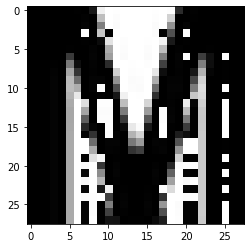

In [19]:
plt.imshow(noise_example_L, cmap=plt.cm.gray)

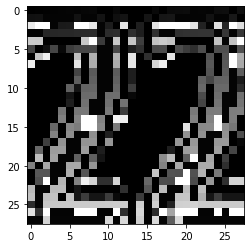

In [20]:
plt.imshow(noise_example_N, cmap=plt.cm.gray)

In [22]:
point_test_tensor = torch.from_numpy(np.array(noise_example_N.flatten()).astype(np.float32))
predicted = model(point_test_tensor).detach().numpy()
_,predictions = torch.max(torch.reshape(torch.tensor(predicted),(1,2)),1)
print(predictions)

tensor([1])


In [23]:
print(model.state_dict())

OrderedDict([('l1.weight', tensor([[ 0.0189,  0.0077,  0.0189,  ...,  0.0081,  0.0007, -0.0087],
        [ 0.0091, -0.0379,  0.0221,  ..., -0.0160, -0.0211, -0.0003],
        [ 0.0007,  0.0250, -0.0216,  ..., -0.0156,  0.0014,  0.0323],
        ...,
        [-0.0184, -0.0355, -0.0181,  ...,  0.0381,  0.0328,  0.0198],
        [ 0.0192,  0.0275, -0.0174,  ...,  0.0021,  0.0198, -0.0341],
        [ 0.0062, -0.0121,  0.0085,  ..., -0.0136,  0.0195, -0.0160]])), ('l1.bias', tensor([ 0.0046, -0.0222,  0.0324,  0.0283, -0.0199, -0.0050,  0.0256,  0.0038,
         0.0022, -0.0225])), ('l2.weight', tensor([[ 1.2625,  1.2958,  1.1711,  1.3266, -5.6430,  1.4000,  1.1445,  1.3412,
         -5.6782,  1.4143],
        [-2.5023, -2.8414, -2.9156, -3.0299,  2.9548, -2.5887, -2.5933, -2.6207,
          2.9118, -2.3892]])), ('l2.bias', tensor([-5.1269,  1.7363]))])


In [91]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter(os.path.join("D:\dataSmoke","runs"))
writer.add_graph(model,point_test_tensor)#